In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"        

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [403]:
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import sklearn.feature_selection as fs 
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [5]:
import os
os.getcwd()

'C:\\Users\\peddi'

In [6]:
os.chdir('D:\Data science\DS edWisor\First project')

In [7]:
df=pd.read_csv('train_cab.csv')

In [8]:
df1=pd.read_csv('test.csv')

In [9]:
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None

In [10]:
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [11]:
train=df.copy()

In [12]:
test=df1.copy()

In [13]:
train.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0         4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1        16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2         5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3         7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4         5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.841610         40.712278              1.0  
1         -73.979268         40.782004              1.0  
2         -73.991242         40.750562              2.0  
3         -73.991567         40.758092              1.0  
4         -73.956655         40.783762              1.0

In [14]:
test.head()

pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-01-27 13:08:24 UTC        -73.973320        40.763805   
1  2015-01-27 13:08:24 UTC        -73.986862        40.719383   
2  2011-10-08 11:53:44 UTC        -73.982524        40.751260   
3  2012-12-01 21:12:12 UTC        -73.981160        40.767807   
4  2012-12-01 21:12:12 UTC        -73.966046        40.789775   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.981430         40.743835                1  
1         -73.998886         40.739201                1  
2         -73.979654         40.746139                1  
3         -73.990448         40.751635                1  
4         -73.988565         40.744427                1

### Exploratory data analysis

In [15]:
train.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count      16067.000000     16067.000000       16067.000000      16067.000000   
mean         -72.462787        39.914725         -72.462328         39.897906   
std           10.578384         6.826587          10.575062          6.187087   
min          -74.438233       -74.006893         -74.429332        -74.006377   
25%          -73.992156        40.734927         -73.991182         40.734651   
50%          -73.981698        40.752603         -73.980172         40.753567   
75%          -73.966838        40.767381         -73.963643         40.768013   
max           40.766125       401.083332          40.802437         41.366138   

       passenger_count  
count     16012.000000  
mean          2.625070  
std          60.844122  
min           0.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max        5345.000000

In [16]:
train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [17]:
train.shape

(16067, 7)

In [18]:
train.dropna(inplace=True)

In [19]:
train.shape

(15988, 7)

In [20]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [21]:
pp.ProfileReport(train)

In [22]:
train['fare_amount']=pd.to_numeric(train['fare_amount'],errors='coerce')

In [23]:
train['fare_amount'].isnull().sum()

1

In [24]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15988 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15987 non-null  float64
 1   pickup_datetime    15988 non-null  object 
 2   pickup_longitude   15988 non-null  float64
 3   pickup_latitude    15988 non-null  float64
 4   dropoff_longitude  15988 non-null  float64
 5   dropoff_latitude   15988 non-null  float64
 6   passenger_count    15988 non-null  float64
dtypes: float64(6), object(1)
memory usage: 999.2+ KB


<Figure size 72x72 with 0 Axes>

<Figure size 72x72 with 0 Axes>

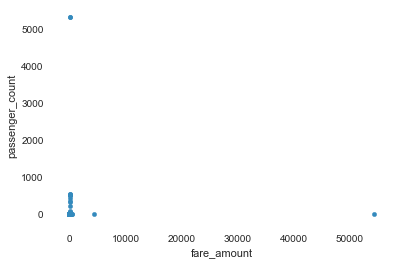

In [26]:
plt.figure(figsize=(1,1))
train.plot(x='fare_amount',y='passenger_count',kind='scatter')

In [27]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], errors='coerce',infer_datetime_format=True)

In [28]:
train.isnull().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [29]:
train.dropna(inplace=True)

In [30]:
# Add datetime parameters for pickup_datetime
train["Year"] = train.pickup_datetime.dt.year
train["Month"] = train.pickup_datetime.dt.month
train["Date"] = train.pickup_datetime.dt.day
#train["Day"] = train.pickup_datetime.dt.day
train["Hour"]= train.pickup_datetime.dt.hour
train["Minute"]= train.pickup_datetime.dt.minute
train["Dayofweek"] = train.pickup_datetime.dt.dayofweek
train["Dayofyear"] = train.pickup_datetime.dt.dayofyear

In [31]:
train.head()

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  Year  Month  Date  \
0         -73.841610         40.712278              1.0  2009      6    15   
1         -73.979268         40.782004              1.0  2010      1     5   
2         -73.991242         40.750562              2.0  2011      8    18   
3         -73.991567         40.758092              1.0  2012      4    21   
4         -73.956655         40.783762              1.0  2010      3     9   

   Hour  Minute  Dayofweek  Dayofyear  
0    17      26          0        166  
1    16      52          1          5  
2     0      35          3        230  
3     4      30          5        112  
4     7      51          1         68

In [32]:
# Drop original saledate
train.drop("pickup_datetime", axis=1, inplace=True)

In [33]:
train.shape

(15986, 13)

In [34]:
train.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
0         40.712278              1.0  2009      6    15    17      26   
1         40.782004              1.0  2010      1     5    16      52   
2         40.750562              2.0  2011      8    18     0      35   
3         40.758092              1.0  2012      4    21     4      30   
4         40.783762              1.0  2010      3     9     7      51   

   Dayofweek  Dayofyear  
0          0        166  
1          1          5  
2          3        230  
3          5        112  
4          1         68

<Figure size 1080x432 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'fare_amount')

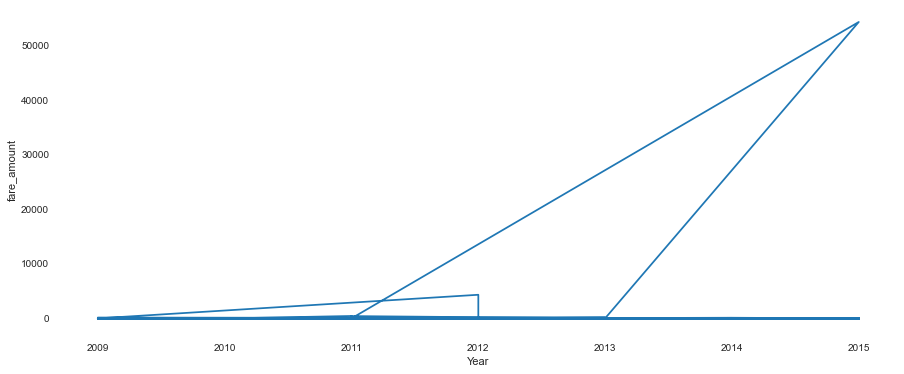

In [35]:
plt.figure(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('fare_amount')
plt.plot('Year','fare_amount',data=train)

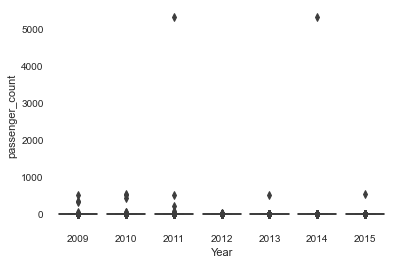

In [36]:
sns.boxplot('Year','passenger_count',data=train)

- From the above graph it is seen that passenger is highest in 2011 and 2014

In [37]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
Year                   int64
Month                  int64
Date                   int64
Hour                   int64
Minute                 int64
Dayofweek              int64
Dayofyear              int64
dtype: object

In [38]:
train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  15986.000000      15986.000000     15986.000000       15986.000000   
mean      15.030453        -72.464352        39.915577         -72.463909   
std      431.213944         10.573594         6.829028          10.570256   
min       -3.000000        -74.438233       -74.006893         -74.429332   
25%        6.000000        -73.992144        40.734935         -73.991182   
50%        8.500000        -73.981691        40.752603         -73.980168   
75%       12.500000        -73.966817        40.767353         -73.963644   
max    54343.000000         40.766125       401.083332          40.802437   

       dropoff_latitude  passenger_count          Year         Month  \
count      15986.000000     15986.000000  15986.000000  15986.000000   
mean          39.898671         2.623272   2011.729138      6.262542   
std            6.186375        60.892140      1.864090      3.447766   
min          -74.006377         0.000000   2009.000000      1.000000   
25%           40.734647         1.000000   2010.000000      3.000000   
50%           40.753549         1.000000   2012.000000      6.000000   
75%           40.768005         2.000000   2013.000000      9.000000   
max           41.366138      5345.000000   2015.000000     12.000000   

               Date          Hour        Minute     Dayofweek     Dayofyear  
count  15986.000000  15986.000000  15986.000000  15986.000000  15986.000000  
mean      15.672589     13.498436     29.642375      3.034155    175.063493  
std        8.683416      6.520900     17.298383      1.968748    105.152877  
min        1.000000      0.000000      0.000000      0.000000      1.000000  
25%        8.000000      9.000000     15.000000      1.000000     84.000000  
50%       16.000000     14.000000     30.000000      3.000000    167.000000  
75%       23.000000     19.000000     45.000000      5.000000    268.000000  
max       31.000000     23.000000     59.000000      6.000000    366.000000

In [39]:
train['passenger_count'].sum()

41935.619999999995

In [40]:
train['fare_amount'].sum()

240276.82

In [41]:
train['Month'].unique()

array([ 6,  1,  8,  4,  3, 11,  9, 12,  7,  2,  5, 10], dtype=int64)

#### Observations:
- In the day of week the data is for all the seven days of the week from Sun-Sat and 24/7 because you see cabs running even at 23:.. hrs time
- There are a maximum of 5345 cab users in some years and there are 0 users in some days. 
- This dataset contains the cab data from years 2009-2015
- The profit of the cabs business on the whole in these years are about Rs.240276.82
- The cab services are open on all the montghs from Jan'2009-Dec'2015
- Have removed many null values of passengers and fare_amounts as it is of no use for prediction

In [42]:
train['passenger_count']=train['passenger_count'].astype(int)

In [43]:
zero_passengers=train[train['passenger_count']==0]

In [44]:
zero_passengers.shape

(58, 13)

In [45]:
zero_passengers.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
314          34.0        -73.974899        40.751095         -73.908546   
566           4.9        -73.955322        40.782840         -73.955797   
678           6.5        -73.983397        40.738183         -73.971395   
1160         13.3        -73.998360        40.740348         -73.946455   
1935         10.1        -73.971400        40.795000         -73.967900   

      dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
314          40.881878                0  2015      6     2    23      16   
566          40.773673                0  2012      1    28    21      33   
678          40.758023                0  2012      2    27     7      24   
1160         40.777348                0  2011      5    25    23      58   
1935         40.768600                0  2011     10    23    11       9   

      Dayofweek  Dayofyear  
314           1        153  
566           5         28  
678           0         58  
1160          2        145  
1935          6        296

In [46]:
#Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [47]:
train.shape

(15928, 13)

In [48]:
train.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
0         40.712278                1  2009      6    15    17      26   
1         40.782004                1  2010      1     5    16      52   
2         40.750562                2  2011      8    18     0      35   
3         40.758092                1  2012      4    21     4      30   
4         40.783762                1  2010      3     9     7      51   

   Dayofweek  Dayofyear  
0          0        166  
1          1          5  
2          3        230  
3          5        112  
4          1         68

In [49]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
Year                   int64
Month                  int64
Date                   int64
Hour                   int64
Minute                 int64
Dayofweek              int64
Dayofyear              int64
dtype: object

In [50]:
train['passenger_count'].sort_values(ascending=False)

1146    5345
293     5334
8985     557
971      554
8506     537
        ... 
9797       1
9796       1
9795       1
9794       1
0          1
Name: passenger_count, Length: 15928, dtype: int32

In [51]:
## finding the outliers in fare_amount
train['fare_amount'].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
           ...   
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
Name: fare_amount, Length: 15928, dtype: float64

In [52]:
train.drop(train[train['fare_amount']<=1].index,axis=0,inplace=True)

In [53]:
train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  15923.000000      15923.000000     15923.000000       15923.000000   
mean      15.056567        -72.467682        39.917415         -72.457953   
std      432.065824         10.562904         6.827692          10.590722   
min        1.140000        -74.438233       -74.006893         -74.429332   
25%        6.000000        -73.992141        40.734946         -73.991182   
50%        8.500000        -73.981689        40.752632         -73.980157   
75%       12.500000        -73.966808        40.767366         -73.963646   
max    54343.000000         40.766125       401.083332          40.802437   

       dropoff_latitude  passenger_count          Year         Month  \
count      15923.000000     15923.000000  15923.000000  15923.000000   
mean          39.895319         2.633109   2011.729888      6.265653   
std            6.198371        61.012169      1.866733      3.447457   
min          -74.006377         1.000000   2009.000000      1.000000   
25%           40.734681         1.000000   2010.000000      3.000000   
50%           40.753557         1.000000   2012.000000      6.000000   
75%           40.768008         2.000000   2013.000000      9.000000   
max           41.366138      5345.000000   2015.000000     12.000000   

               Date          Hour        Minute     Dayofweek     Dayofyear  
count  15923.000000  15923.000000  15923.000000  15923.000000  15923.000000  
mean      15.673052     13.493688     29.649312      3.034792    175.158576  
std        8.683763      6.523195     17.299271      1.968932    105.143382  
min        1.000000      0.000000      0.000000      0.000000      1.000000  
25%        8.000000      9.000000     15.000000      1.000000     84.000000  
50%       16.000000     14.000000     30.000000      3.000000    167.000000  
75%       23.000000     19.000000     45.000000      5.000000    268.000000  
max       31.000000     23.000000     59.000000      6.000000    366.000000

In [54]:
train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Hour                 0
Minute               0
Dayofweek            0
Dayofyear            0
dtype: int64

In [55]:
train.shape

(15923, 13)

In [56]:
train['passenger_count'].value_counts()

1       11238
2        2319
5        1044
3         675
4         327
6         301
43          2
53          2
554         1
536         1
345         1
537         1
58          1
354         1
535         1
35          1
87          1
531         1
5345        1
236         1
5334        1
557         1
456         1
Name: passenger_count, dtype: int64

In [57]:
passengers11=train[train['passenger_count']>10]

In [58]:
passengers11.shape

(19, 13)

In [59]:
#passenger count in a cab cannot be greater than 10 hence dropping the rows containing passengers>10
train.drop(train[train["passenger_count"]>10].index, axis=0,inplace=True)  

In [60]:
train[train['passenger_count']>10]

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

In [61]:
# Latitude and logitude are a pair of numbers used to describe a position on the plane of a geographic coordinate system
# The numbers are in decimal degrees format and range from -90 to +90 for latitude and -180 to +180 for logitude
# Hence lets check the correct latitude and logitude values in the dataset
train[(train['pickup_latitude']<-90)|(train['pickup_latitude']>90)]
train[(train['dropoff_latitude']<-90)|(train['dropoff_latitude']>90)]
train[(train['pickup_longitude']<-180)|(train['pickup_longitude']>180)]
train[(train['dropoff_longitude']<-180)|(train['dropoff_longitude']>180)]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
5686          3.3        -73.947235       401.083332         -73.951392   

      dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
5686         40.778927                1  2011      7    30    11      15   

      Dayofweek  Dayofyear  
5686          5        211

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

In [62]:
# So dropping the one row which cannot exist on the earth according to their latitude and logitude values
train.drop(train[(train['pickup_latitude']<-90)|(train['pickup_latitude']>90)].index,axis=0,inplace=True)

In [63]:
train[(train['pickup_latitude']<-90)|(train['pickup_latitude']>90)]

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

In [64]:
#%%time
train.shape

(15903, 13)

In [65]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Hour', 'Minute', 'Dayofweek', 'Dayofyear'],
      dtype='object')

In [66]:
dup=train.copy()

In [67]:
import numpy as np

In [68]:
# another method of finding outliers then I find most accurate way of finding outliers or defects or errors in
     #latitide and logitude values is possible by knowing the range of those values so I continue with that method
# The below method shows more outliers then these are not outliers because the region exists with these outliers
coutliers=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','Year',
       'Month', 'Date', 'Hour', 'Minute', 'Dayofweek', 'Dayofyear']
for l in coutliers:
    #extract quartiles
    q75,q25=np.percentile(dup[l],[75,25])
    #calculate IQR
    iqr=q75-q25
    #calculate inner and outer fence
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
    #replace with na
    dup.loc[dup[l]<minimum,l]=np.nan
    dup.loc[dup[l]>maximum,l]=np.nan
    #calculate missing value
    missing_value=pd.DataFrame(dup.isnull().sum())

In [69]:
missing_value

0
fare_amount           0
pickup_longitude   1102
pickup_latitude     776
dropoff_longitude  1164
dropoff_latitude    996
passenger_count       0
Year                  0
Month                 0
Date                  0
Hour                  0
Minute                0
Dayofweek             0
Dayofyear             0

In [70]:
dup.dropna(inplace=True)

In [71]:
dup.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Hour                 0
Minute               0
Dayofweek            0
Dayofyear            0
dtype: int64

In [72]:
dup.shape

(13691, 13)

In [73]:
dup[(dup['pickup_latitude']<-90)|(dup['pickup_latitude']>90)]
dup[(dup['dropoff_latitude']<-90)|(dup['dropoff_latitude']>90)]
dup[(dup['pickup_longitude']<-180)|(dup['pickup_longitude']>180)]
dup[(dup['dropoff_longitude']<-180)|(dup['dropoff_longitude']>180)]

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

In [74]:
# So the final shape of the dataframe after EDA
train.shape

(15903, 13)

## Feature engineering

### Haversine formula
- The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.
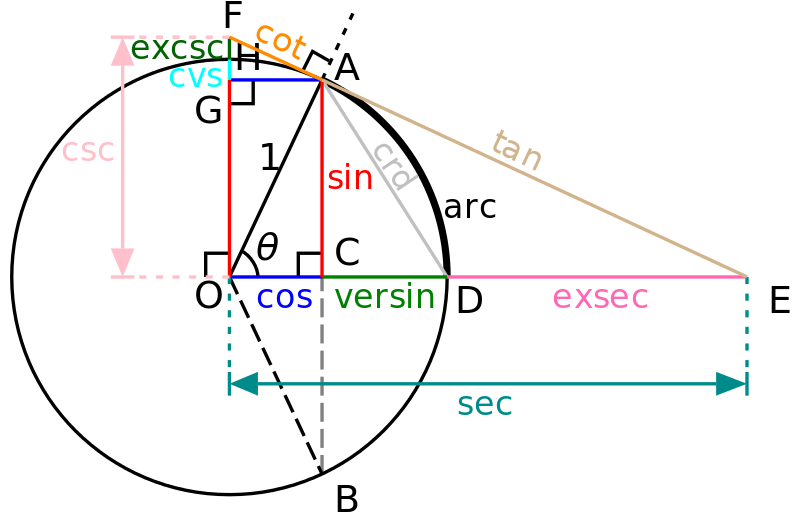
The following equation where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) is how we translate the above formula to include latitude and longitude coordinates. Note that angles need to be in radians to pass to trig functions:

a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
c = 2 * atan2( √a, √(1−a) )
d = R ⋅ c

In [75]:
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
#This new variable distance is added to dataframe which calculates distance cab travelled from point of source to destination
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
    
    #meters=km*1000
    #print(f"Distance: {meters} m")
    #print(f"Distance: {km} km")

In [76]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [77]:
haversine([-0.116773,51.510357,-77.009003,38.889931])

5897.658288856053

In [78]:
train.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
0         40.712278                1  2009      6    15    17      26   
1         40.782004                1  2010      1     5    16      52   
2         40.750562                2  2011      8    18     0      35   
3         40.758092                1  2012      4    21     4      30   
4         40.783762                1  2010      3     9     7      51   

   Dayofweek  Dayofyear  distance  
0          0        166  1.030764  
1          1          5  8.450134  
2          3        230  1.389525  
3          5        112  2.799270  
4          1         68  1.999157

In [79]:
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
10411       0.000000
657         0.000000
8270        0.000000
11593       0.000000
15648       0.000000
Name: distance, Length: 15903, dtype: float64

In [80]:
# there are some outliers in distance 
# there are many cabs travelling to greater distance so I am removing them the highest of >8000 km is not good travel in cab
# there are such outliers there are less some travels I am removing them
# In a city there will be max of 600-800 sq km so I am taking Hyd with 625 sq km and removing greater than that
train.drop(train[train['distance']>=625].index,axis=0,inplace=True)

In [81]:
train.reset_index(inplace=True,drop=True)

In [82]:
train.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
0         40.712278                1  2009      6    15    17      26   
1         40.782004                1  2010      1     5    16      52   
2         40.750562                2  2011      8    18     0      35   
3         40.758092                1  2012      4    21     4      30   
4         40.783762                1  2010      3     9     7      51   

   Dayofweek  Dayofyear  distance  
0          0        166  1.030764  
1          1          5  8.450134  
2          3        230  1.389525  
3          5        112  2.799270  
4          1         68  1.999157

In [83]:
train.shape

(15880, 14)

### Data visualization

In [84]:
# Correlation anaysis
# Correlation plot
numeric=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance']
train_corr=train.loc[:,numeric]

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000         -0.001109         0.000982   
pickup_longitude     -0.001109          1.000000        -0.982975   
pickup_latitude       0.000982         -0.982975         1.000000   
dropoff_longitude    -0.001088          0.999991        -0.982979   
dropoff_latitude      0.001028         -0.982986         0.999980   
distance              0.018330         -0.097469         0.092672   

                   dropoff_longitude  dropoff_latitude  distance  
fare_amount                -0.001088          0.001028  0.018330  
pickup_longitude            0.999991         -0.982986 -0.097469  
pickup_latitude            -0.982979          0.999980  0.092672  
dropoff_longitude           1.000000         -0.982987 -0.097953  
dropoff_latitude           -0.982987          1.000000  0.092607  
distance                   -0.097953          0.092607  1.000000  


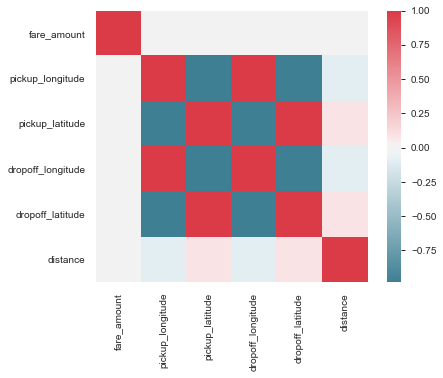

In [85]:
fig,ax=plt.subplots(figsize=(7,5))
corr=train_corr.corr()
print(corr)
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

Wall time: 24.8 s


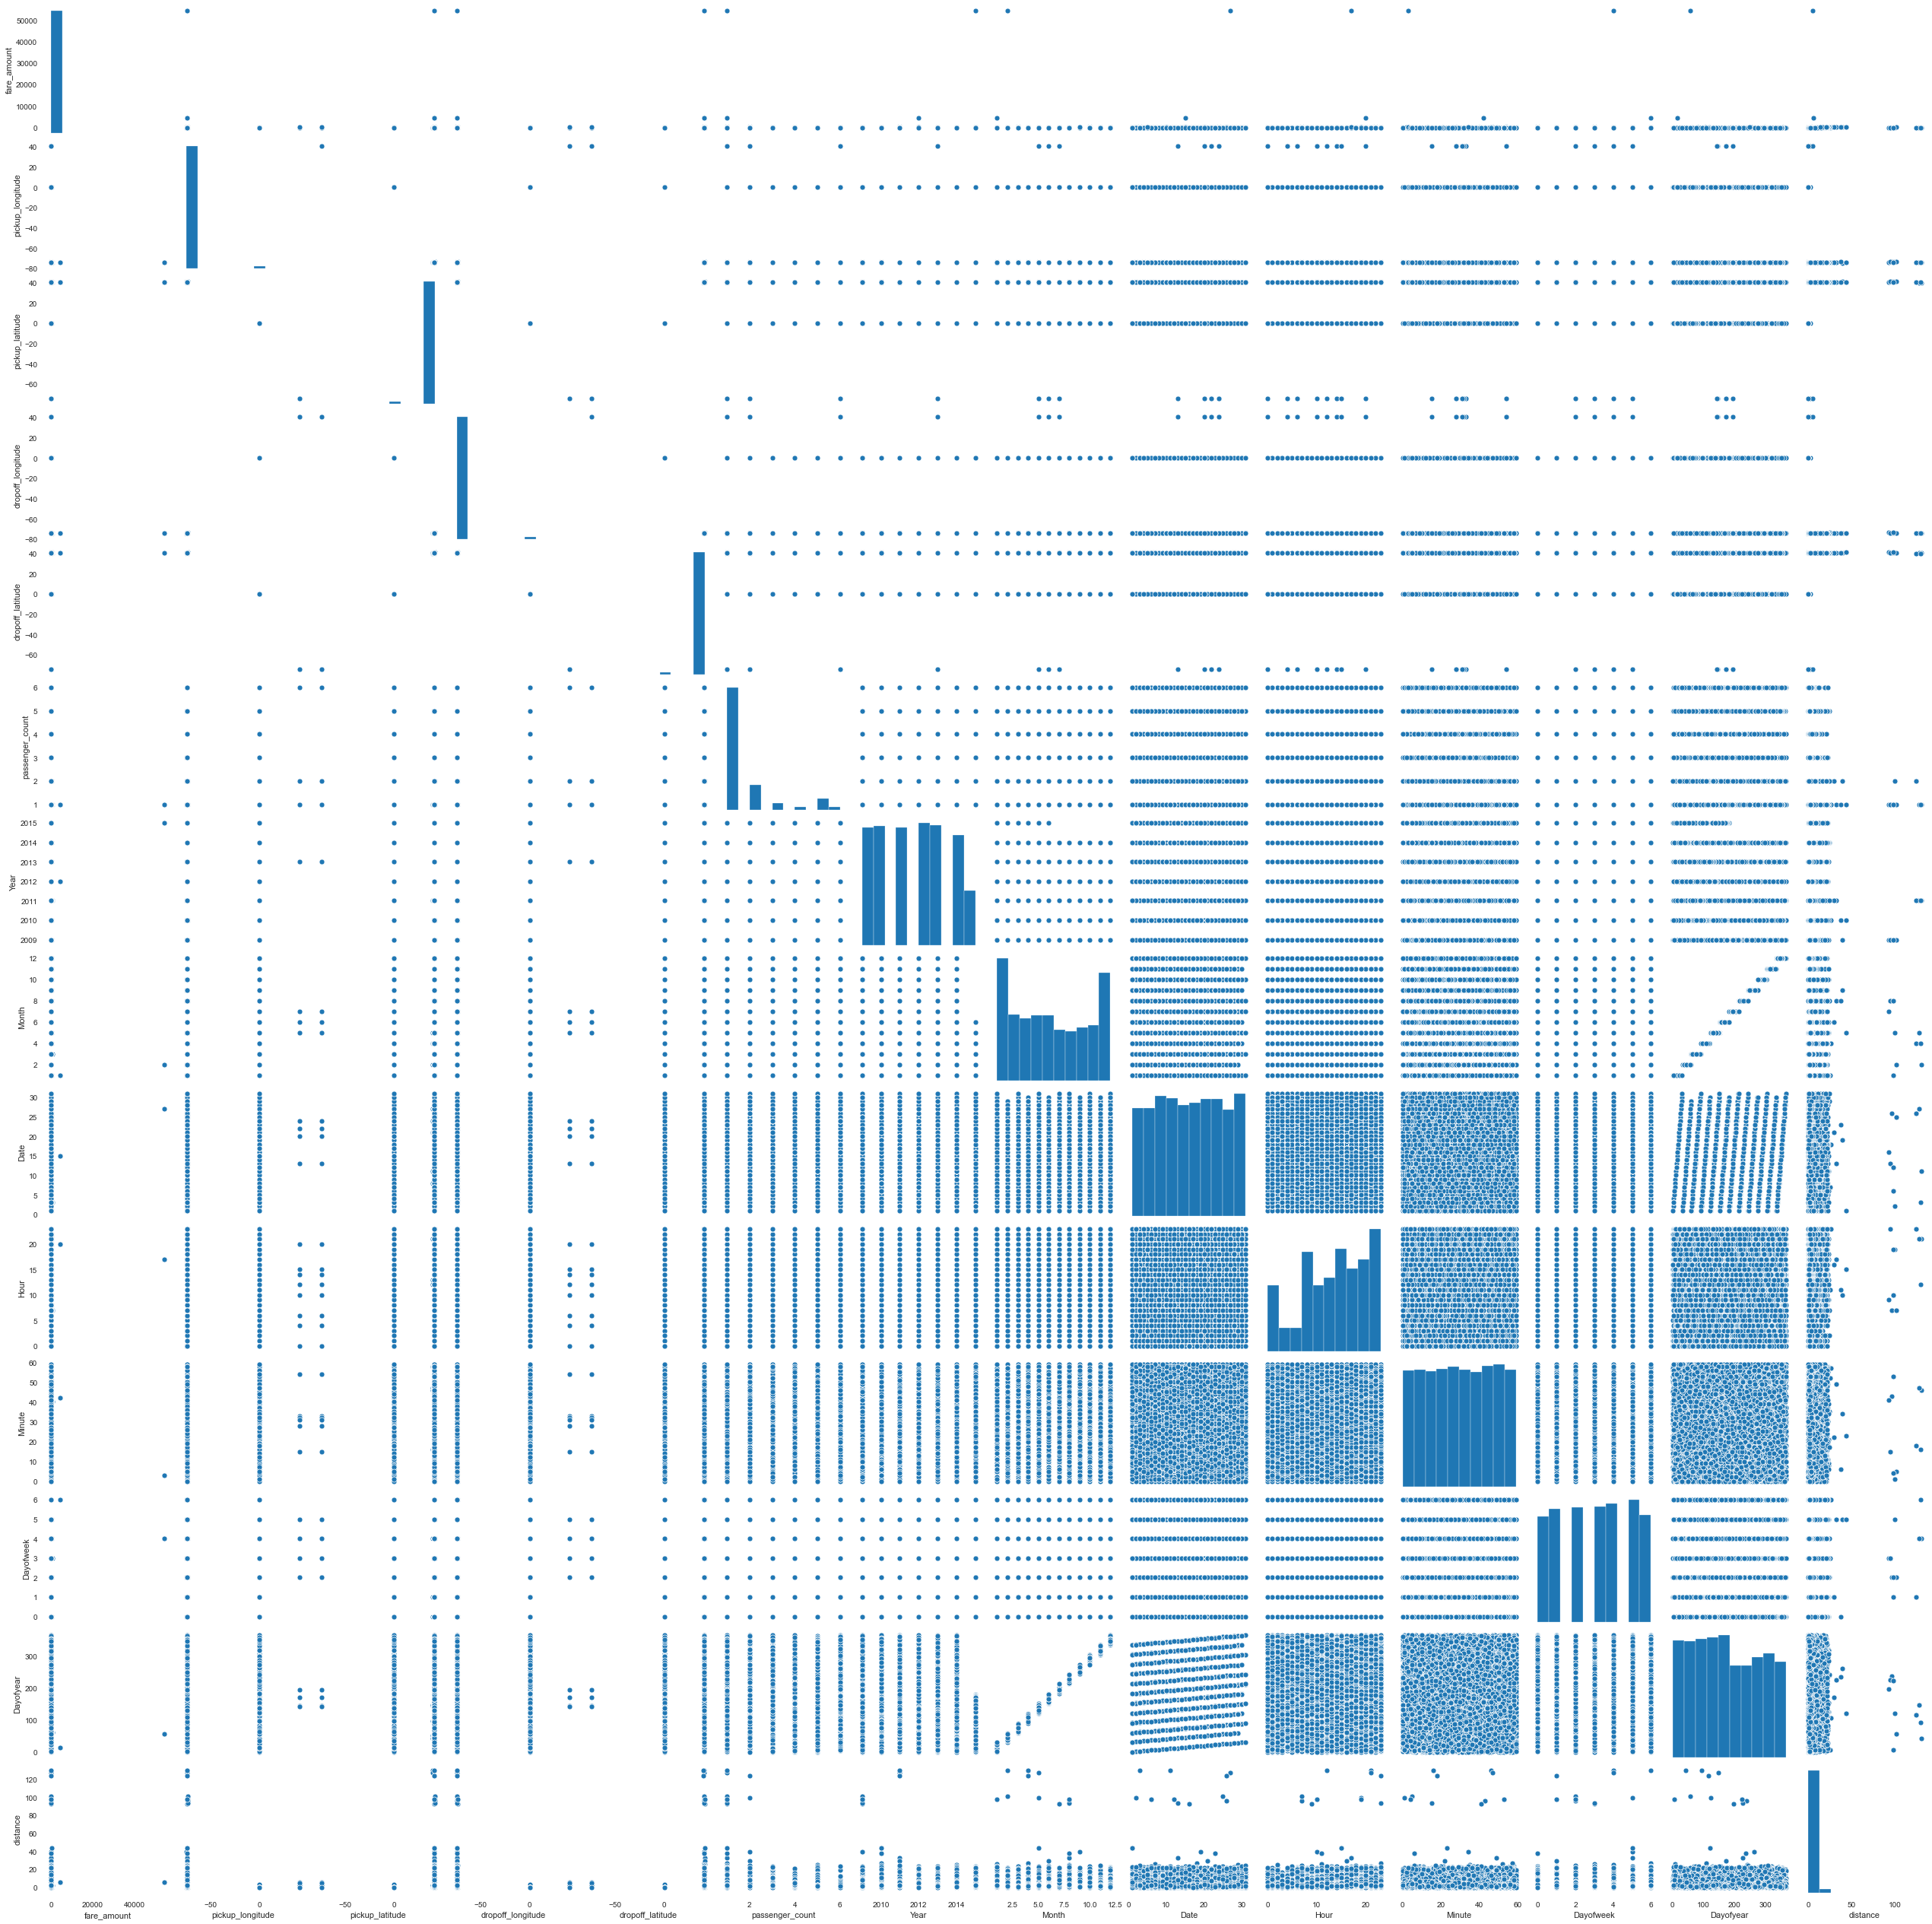

In [86]:
%%time
sns.pairplot(train)

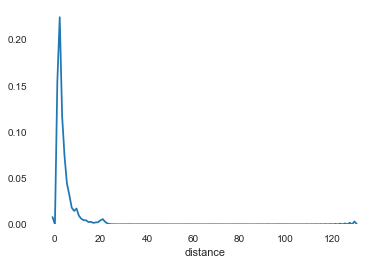

In [87]:
sns.distplot(train['distance'],hist=False)

In [88]:
train[train['distance']==0]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
10             5.5          0.000000         0.000000           0.000000   
14             5.0          0.000000         0.000000           0.000000   
98            52.0        -74.035839        40.747320         -74.035839   
116            8.0          0.000000         0.000000           0.000000   
178            6.5        -73.998488        40.726303         -73.998488   
...            ...               ...              ...                ...   
15743         10.9          0.000000         0.000000           0.000000   
15751          3.3          0.000000         0.000000           0.000000   
15828         10.9          0.000000         0.000000           0.000000   
15836          5.5        -73.984123        40.760387         -73.984123   
15870         38.3          0.000000         0.000000           0.000000   

       dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
10             0.000000                3  2012     12    24    11      24   
14             0.000000                1  2013     11    23    12      57   
98            40.747320                1  2009      3    25     0       8   
116            0.000000                2  2013      1    17    17      22   
178           40.726303                1  2014      1     8    21      55   
...                 ...              ...   ...    ...   ...   ...     ...   
15743          0.000000                5  2010      5    18    20      34   
15751          0.000000                3  2009     10     1    20      32   
15828          0.000000                2  2011      3     4    14       5   
15836         40.760387                6  2013      4    10    12      24   
15870          0.000000                1  2012     12    17    14      59   

       Dayofweek  Dayofyear  distance  
10             0        359       0.0  
14             5        327       0.0  
98             2         84       0.0  
116            3         17       0.0  
178            2          8       0.0  
...          ...        ...       ...  
15743          1        138       0.0  
15751          3        274       0.0  
15828          4         63       0.0  
15836          2        100       0.0  
15870          0        352       0.0  

[454 rows x 14 columns]

In [89]:
train.drop(train[train['distance']==0].index,axis=0,inplace=True)

In [90]:
train[train['distance']==0]

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear, distance]
Index: []

In [91]:
train.shape

(15426, 14)

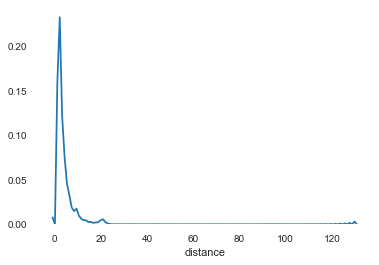

In [92]:
sns.distplot(train['distance'],hist=False)

In [93]:
train['distance'].value_counts()

1.205594     1
4.905533     1
1.278791     1
2.349355     1
6.301404     1
            ..
11.620188    1
3.202905     1
0.956501     1
2.585365     1
0.283359     1
Name: distance, Length: 15426, dtype: int64

In [94]:
train['distance'].sort_values(ascending=False)

10549    129.950482
14357    129.560455
11456    127.509261
12062    123.561157
5552     101.094619
            ...    
13314      0.000344
478        0.000279
15185      0.000238
13408      0.000202
15309      0.000111
Name: distance, Length: 15426, dtype: float64

In [95]:
train.loc[9140:9147]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
9140          6.0        -73.993972        40.741737         -74.002210   
9141         27.5        -73.975027        40.741690         -73.966518   
9142          7.5        -73.980680        40.764899         -73.982210   
9143          3.5        -73.960816        40.780686         -73.957107   
9144          5.0        -74.010230        40.712267         -74.006748   
9145          6.5        -73.950913        40.783224         -73.966307   
9146         13.0        -73.987953        40.728180         -73.943620   
9147          8.5        -73.971637        40.760629         -73.956271   

      dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
9140         40.732985                1  2013     10    30    11      40   
9141         40.675677                1  2013      1    29    18      30   
9142         40.774864                1  2013     10    10    23      39   
9143         40.783425                1  2013     12    25    17      24   
9144         40.715784                1  2014     10    21    10      36   
9145         40.764835                1  2009      4    26    13      49   
9146         40.719765                1  2014      8     2     5      31   
9147         40.784562                3  2009     10    19    18      35   

      Dayofweek  Dayofyear  distance  
9140          2        303  1.195333  
9141          1         29  7.375267  
9142          3        283  1.115523  
9143          2        359  0.436212  
9144          1        294  0.488942  
9145          6        116  2.421034  
9146          5        214  3.851353  
9147          0        292  2.959129

- From the above distplot and analyzing distance column it is clear that the cabs travelled a maximum distance of 8667.54 km
- There are more travels of greater than 8000 km which says that people prefer to travel in cabs when they are travelling to longer distance.
- There are mostly medium travelling where there is very short distance may be for smaller rides also cabs are preffered.
- The travels are very less when the distance is in the medium range from source to destination then people are preferring to travel through other modes of vehicles than cabs.
- Finnaly cabs business is overall good for in every month.

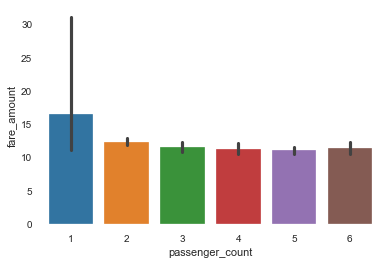

In [96]:
sns.barplot(x='passenger_count',y='fare_amount',data=train)

In [97]:
train['fare_amount'].sort_values(ascending=False)

956     54343.00
1012     4343.00
566       453.00
922       434.00
1411      165.00
          ...   
8453        2.50
8460        2.50
1610        2.50
1597        2.50
1356        1.14
Name: fare_amount, Length: 15426, dtype: float64

In [98]:
train.loc[1010:1020,]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
1010         9.50        -73.988892        40.748325         -73.987267   
1011        12.50        -73.997207        40.763683         -73.948180   
1012      4343.00        -73.976309        40.751634         -74.014854   
1013         7.50        -73.989262        40.755323         -73.987957   
1014         5.00        -73.990797        40.724355         -74.000062   
1015        49.57        -73.776713        40.645447         -73.980527   
1016        22.10        -73.992632        40.725333         -73.951342   
1017        12.10        -73.973735        40.747927         -73.986357   
1018         5.30        -74.001227        40.736362         -73.996073   
1019        14.50        -74.004507        40.741932         -74.005212   
1020         4.50        -73.955706        40.779737         -73.961877   

      dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
1010         40.729088                1  2015      5    30    22      38   
1011         40.782812                1  2009      5    30     3      58   
1012         40.709044                1  2012      1    15    20      42   
1013         40.757440                1  2012      9    15    12      38   
1014         40.727062                2  2012     10    27     2      39   
1015         40.770763                1  2009     12     8     6      24   
1016         40.730323                1  2011      6    19     1      40   
1017         40.775677                6  2012      6    17    14      13   
1018         40.726637                1  2012      8    15    11      58   
1019         40.705272                1  2013      6     9    13      42   
1020         40.779494                1  2014      5     8    12       9   

      Dayofweek  Dayofyear   distance  
1010          5        150   2.143492  
1011          5        150   4.644193  
1012          6         15   5.742518  
1013          5        259   0.259798  
1014          5        301   0.836759  
1015          1        342  22.120296  
1016          6        170   3.523286  
1017          6        169   3.263645  
1018          2        228   1.165316  
1019          6        160   4.076839  
1020          3        128   0.520299

In [99]:
train.loc[1070:1074]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
1070          4.5        -73.973940        40.791506         -73.966737   
1071          6.9        -73.962573        40.772600         -73.956101   
1072         12.1        -73.974392        40.751537         -73.953723   
1073          5.7        -73.968707        40.770104         -73.977761   
1074          5.5        -73.960113        40.769875         -73.954704   

      dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
1070         40.803960                1  2011     12    11    16      30   
1071         40.783683                2  2011      5    23     8       6   
1072         40.779310                1  2011      2     3    12      19   
1073         40.758068                1  2010      5    18     9      39   
1074         40.777850                1  2013     11    26    14      17   

      Dayofweek  Dayofyear  distance  
1070          6        345  1.511741  
1071          0        143  1.347486  
1072          3         34  3.545013  
1073          1        138  1.540325  
1074          1        330  0.996914

In [100]:
train.loc[605:610]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
605         15.5        -73.975655        40.792012         -73.951775   
606         14.0        -73.948776        40.782494         -73.982201   
607         66.3        -74.438233        40.993260         -74.185996   
608         14.1        -74.003545        40.707399         -73.981312   
609         18.5        -73.987118        40.735960         -73.956410   
610         12.1        -73.983423        40.761300         -74.009493   

     dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
605         40.769527                1  2014      7     9    14      51   
606         40.756611                2  2015      3    14    22      19   
607         40.693874                2  2009      9    19    10      34   
608         40.750071                1  2010     10     7    21       9   
609         40.780902                2  2010     11     4    17      49   
610         40.747750                1  2011      4    15    18      55   

     Dayofweek  Dayofyear   distance  
605          2        190   3.208400  
606          5         73   4.025652  
607          5        262  39.476975  
608          3        280   5.101370  
609          3        308   5.626977  
610          4        105   2.663115

- There are more single customers travelling in the cab and they have been charged the highest.
- The highest payment received is Rs.54343 is by single customer who travelled 5.25 km in 2015. This seems to be unbelievable. So its better to remove this row as it is not possible to pay such high amount and next higher paid amount is Rs.4343 also by single customer who travelled a distance of 5.74 km.

In [101]:
train.drop(train[train['fare_amount']==54343.00].index,axis=0,inplace=True)

In [102]:
train.loc[1012:1016]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
1012      4343.00        -73.976309        40.751634         -74.014854   
1013         7.50        -73.989262        40.755323         -73.987957   
1014         5.00        -73.990797        40.724355         -74.000062   
1015        49.57        -73.776713        40.645447         -73.980527   
1016        22.10        -73.992632        40.725333         -73.951342   

      dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
1012         40.709044                1  2012      1    15    20      42   
1013         40.757440                1  2012      9    15    12      38   
1014         40.727062                2  2012     10    27     2      39   
1015         40.770763                1  2009     12     8     6      24   
1016         40.730323                1  2011      6    19     1      40   

      Dayofweek  Dayofyear   distance  
1012          6         15   5.742518  
1013          5        259   0.259798  
1014          5        301   0.836759  
1015          1        342  22.120296  
1016          6        170   3.523286

In [103]:
train.reset_index(inplace=True,drop=True)

In [104]:
train[train["fare_amount"]>=454]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
980       4343.0        -73.976309        40.751634         -74.014854   

     dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
980         40.709044                1  2012      1    15    20      42   

     Dayofweek  Dayofyear  distance  
980          6         15  5.742518

In [105]:
train.loc[(train.fare_amount>=454),'fare_amount']=600

In [106]:
train.loc[978:981,]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
978          9.5        -73.988892        40.748325         -73.987267   
979         12.5        -73.997207        40.763683         -73.948180   
980        600.0        -73.976309        40.751634         -74.014854   
981          7.5        -73.989262        40.755323         -73.987957   

     dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
978         40.729088                1  2015      5    30    22      38   
979         40.782812                1  2009      5    30     3      58   
980         40.709044                1  2012      1    15    20      42   
981         40.757440                1  2012      9    15    12      38   

     Dayofweek  Dayofyear  distance  
978          5        150  2.143492  
979          5        150  4.644193  
980          6         15  5.742518  
981          5        259  0.259798

In [107]:
train.loc[980:982,]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
980        600.0        -73.976309        40.751634         -74.014854   
981          7.5        -73.989262        40.755323         -73.987957   
982          5.0        -73.990797        40.724355         -74.000062   

     dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
980         40.709044                1  2012      1    15    20      42   
981         40.757440                1  2012      9    15    12      38   
982         40.727062                2  2012     10    27     2      39   

     Dayofweek  Dayofyear  distance  
980          6         15  5.742518  
981          5        259  0.259798  
982          5        301  0.836759

In [108]:
train.loc[1012:1016]

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
1012         16.5        -73.985382        40.741619         -73.920143   
1013         13.5        -73.961967        40.812477         -73.949554   
1014         16.0        -73.983332        40.771330         -73.949402   
1015         10.1        -73.965501        40.806041         -73.954578   
1016          6.9        -73.975290        40.745689         -73.989893   

      dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
1012         40.756329                1  2015      2     2     1       1   
1013         40.781151                4  2015      3    29     9      50   
1014         40.793755                1  2012     11    25     0       9   
1015         40.787414                1  2009     10     9     7      44   
1016         40.741252                1  2011      6    27    11       5   

      Dayofweek  Dayofyear  distance  
1012          0         33  5.733877  
1013          6         88  3.636671  
1014          6        330  3.791957  
1015          4        282  2.266148  
1016          0        178  1.325483

In [109]:
train.shape

(15425, 14)

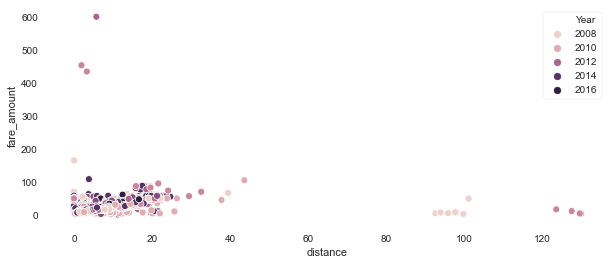

In [110]:
plt.figure(figsize=(10,4));
sns.scatterplot('distance','fare_amount',hue='Year',data=train);

<Figure size 720x288 with 0 Axes>

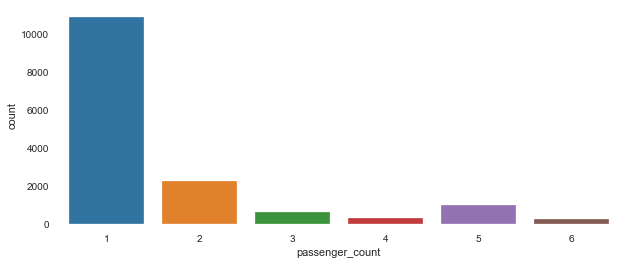

In [111]:
plt.figure(figsize=(10,4))
sns.countplot(x="passenger_count", data=train)

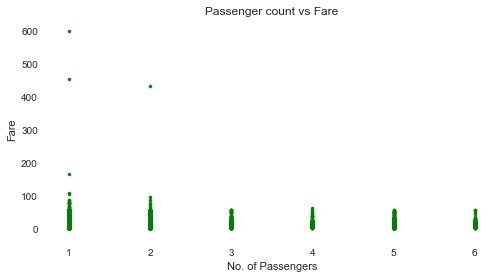

In [112]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(8,4))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10,c='green')
plt.title('Passenger count vs Fare')
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show();

<Figure size 720x288 with 0 Axes>

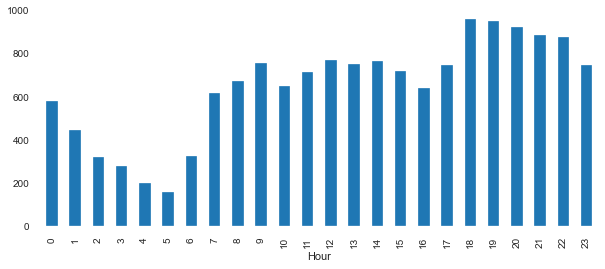

In [113]:
plt.figure(figsize=(10,4))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'Distance')

Text(0, 0.5, 'Fare')

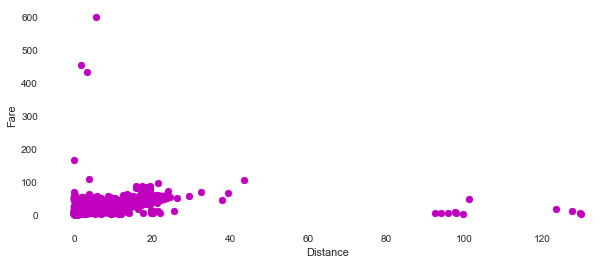

In [114]:
#Relationship between distance and fare 
plt.figure(figsize=(10,4))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "m")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

In [115]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Hour', 'Minute', 'Dayofweek', 'Dayofyear',
       'distance'],
      dtype='object')

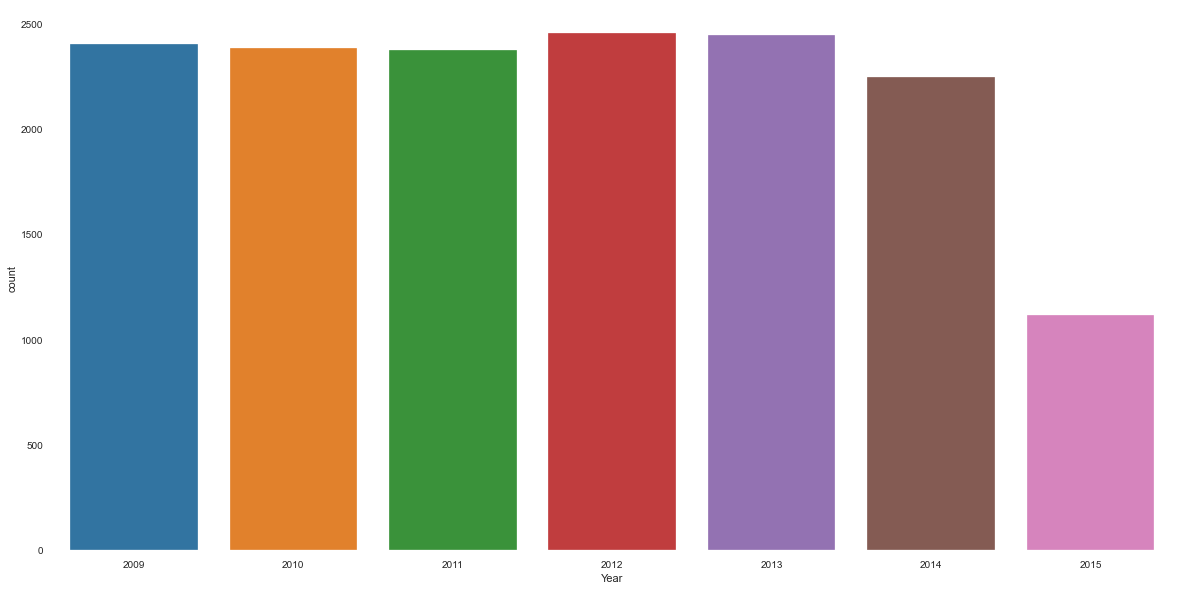

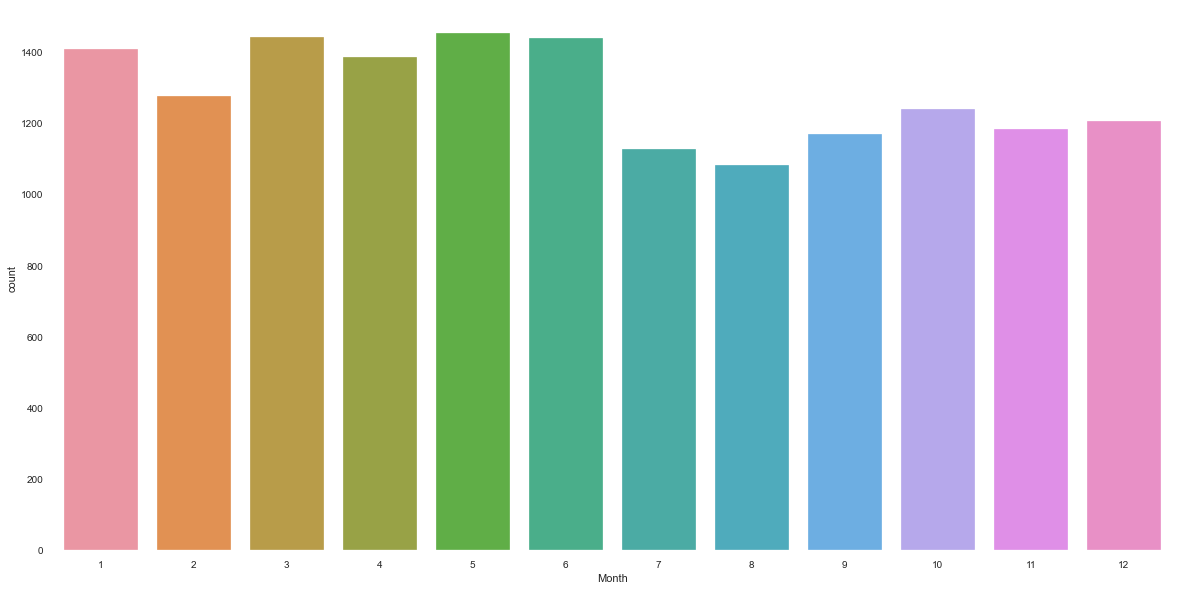

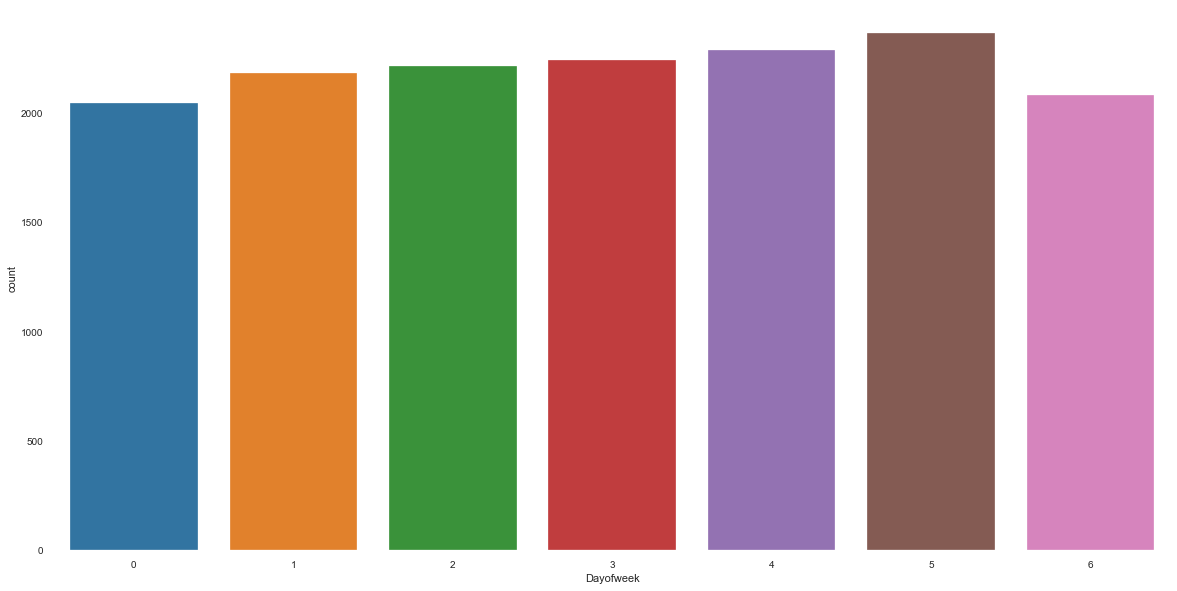

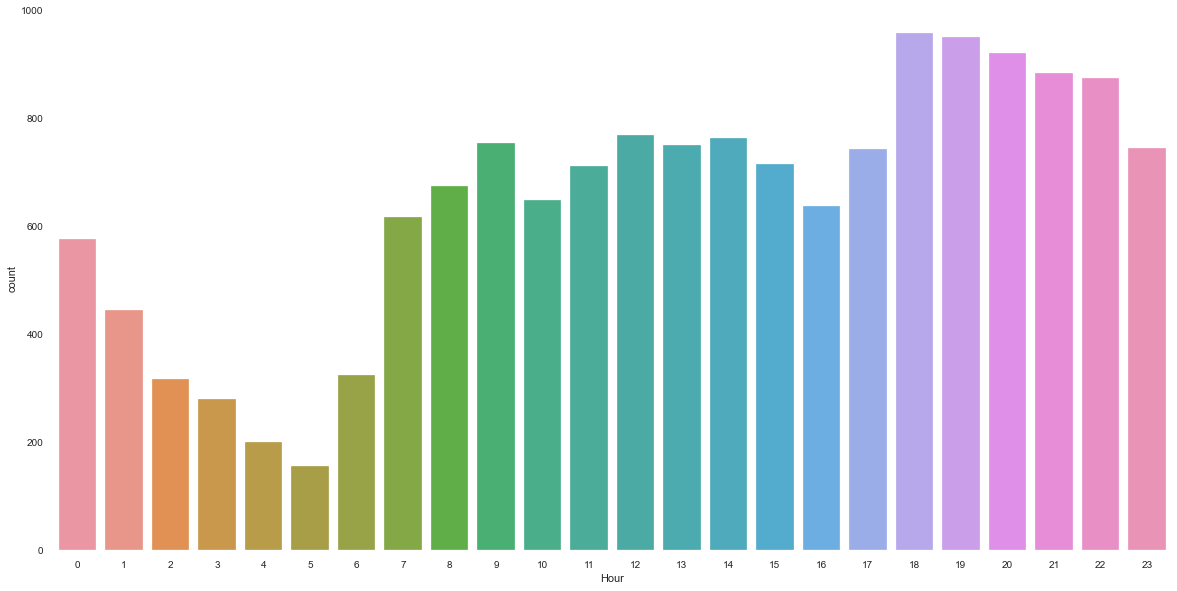

In [385]:
plt.figure(figsize=(20,10));
sns.countplot(train['Year']);
# plt.savefig('year.png')

plt.figure(figsize=(20,10));
sns.countplot(train['Month']);
# plt.savefig('month.png')

plt.figure(figsize=(20,10));
sns.countplot(train['Dayofweek']);
# plt.savefig('day_of_week.png')

plt.figure(figsize=(20,10));
sns.countplot(train['Hour']);
# plt.savefig('hour.png')

<Figure size 1080x504 with 0 Axes>

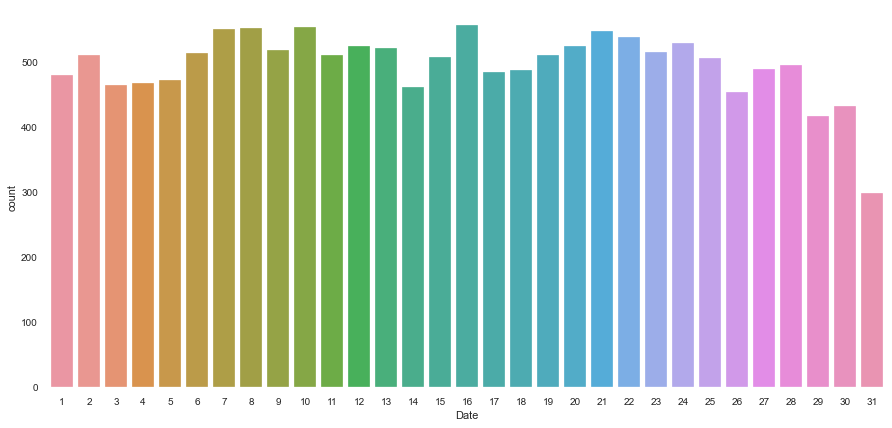

In [389]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Date", data=train)

fare_amount


Text(0.5, 1.0, 'Distribution for Variable fare_amount')

Text(0, 0.5, 'Density')

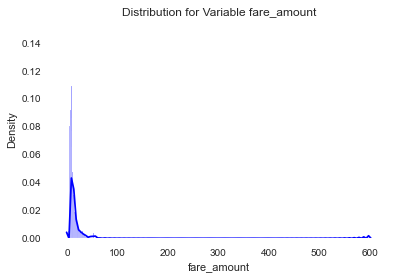

distance


Text(0.5, 1.0, 'Distribution for Variable distance')

Text(0, 0.5, 'Density')

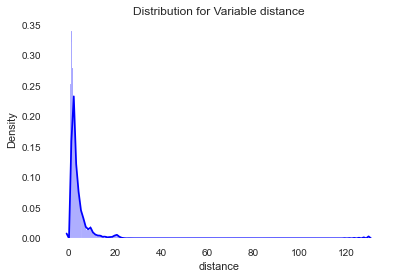

In [117]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show();

<Figure size 432x288 with 0 Axes>

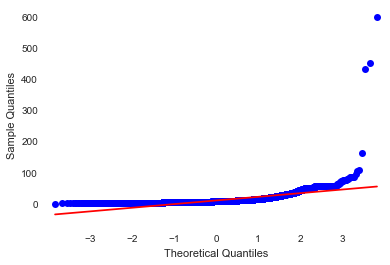

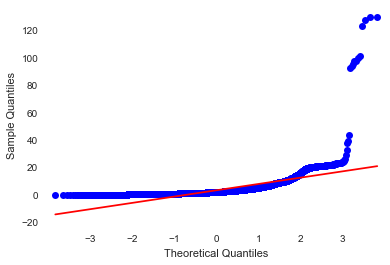

In [118]:
## Q-Q plot
plt.figure(figsize=(6,4))
#plt.subplots(121)
sm.qqplot(train['fare_amount'],line='s')
#plt.show()
#plt.subplots(122)
sm.qqplot(train['distance'],line='s')
plt.show();

In [119]:
train['fare_amount'].sort_values(ascending=False)

980      600.00
549      453.00
891      434.00
1368     165.00
13563    108.00
          ...  
12062      2.50
7070       2.50
8169       2.50
3241       2.50
1314       1.14
Name: fare_amount, Length: 15425, dtype: float64

In [120]:
train['distance'].sort_values(ascending=False)

10249    129.950482
13939    129.560455
11136    127.509261
11732    123.561157
5392     101.094619
            ...    
12935      0.000344
464        0.000279
14752      0.000238
13026      0.000202
14870      0.000111
Name: distance, Length: 15425, dtype: float64

<Figure size 720x288 with 0 Axes>

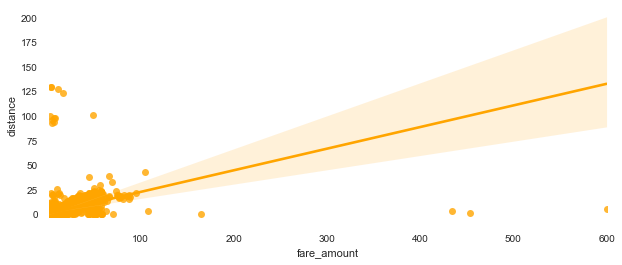

In [121]:
plt.figure(figsize=(10,4))
sns.regplot(x='fare_amount',y='distance',data=train,scatter=True,color='orange')

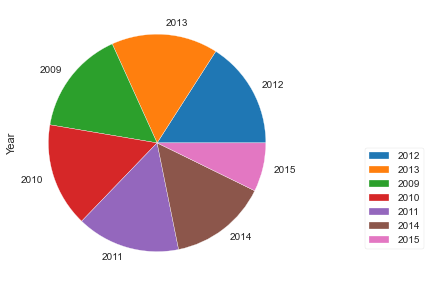

In [122]:
k=train['Year'].value_counts()
k.plot(kind='pie',figsize=(15,5),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))

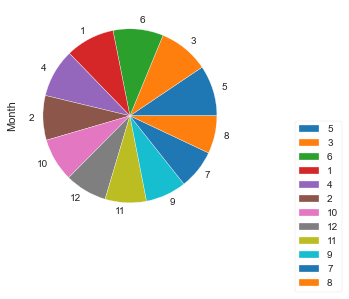

In [123]:
k=train['Month'].value_counts()
k.plot(kind='pie',figsize=(5,4),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))

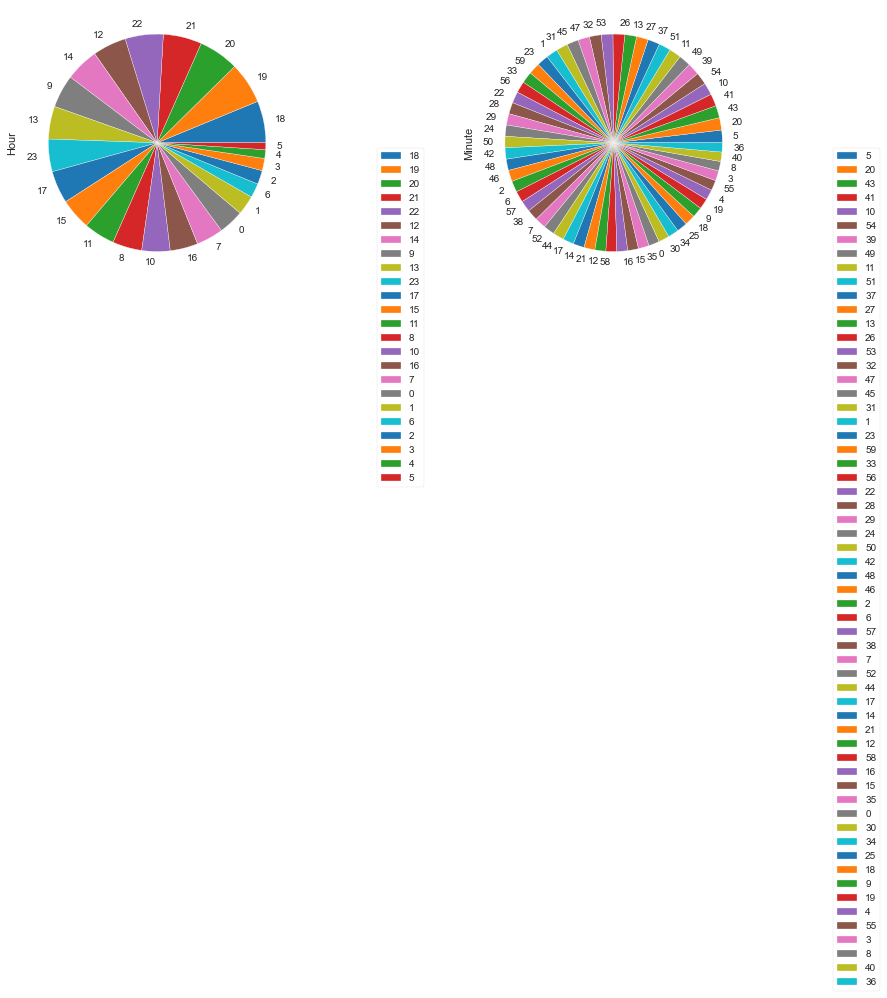

In [124]:
plt.subplot(1,2,1)
k=train['Hour'].value_counts();
k.plot(kind='pie',figsize=(15,5),legend=True);
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));
plt.subplot(1,2,2);
k=train['Minute'].value_counts();
k.plot(kind='pie',figsize=(15,5),legend=True);
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

In [125]:
ctrain=train.copy()

In [126]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
ctrain['fare_amount'] = np.log1p(ctrain['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
ctrain['distance'] = np.log1p(ctrain['distance'])

fare_amount


<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'Distribution for Variable fare_amount')

Text(0, 0.5, 'Density')

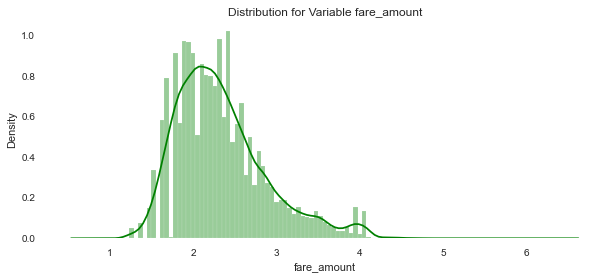

distance


<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'Distribution for Variable distance')

Text(0, 0.5, 'Density')

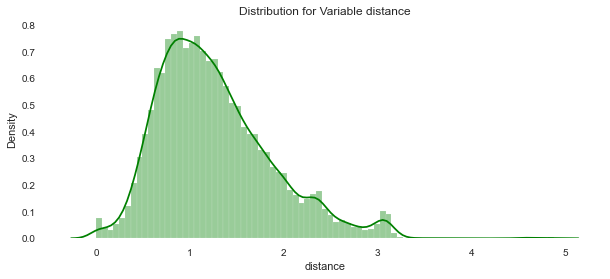

In [127]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i);
    plt.figure(figsize=(10,4));
    sns.distplot(ctrain[i],bins='auto',color='green');
    plt.title("Distribution for Variable "+i);
    plt.ylabel("Density");
    plt.show();

In [128]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Hour', 'Minute', 'Dayofweek', 'Dayofyear',
       'distance'],
      dtype='object')

In [129]:
# Adding a new column time of day in training set
for i in range(train.shape[0]):
    if (train.loc[i,'Hour']>3 and train.loc[i,'Hour']<=9):
        train.loc[i,'Time_of_day']='Morning'
    elif (train.loc[i,'Hour']>9 and train.loc[i,'Hour']<=15):
        train.loc[i,'Time_of_day']='Day'
    elif (train.loc[i,'Hour']>15 and train.loc[i,'Hour']<=19):
        train.loc[i,'Time_of_day']='Evening'
    else:
        train.loc[i,'Time_of_day']='Night'

In [130]:
ctrain['Time_of_day']=train['Time_of_day']

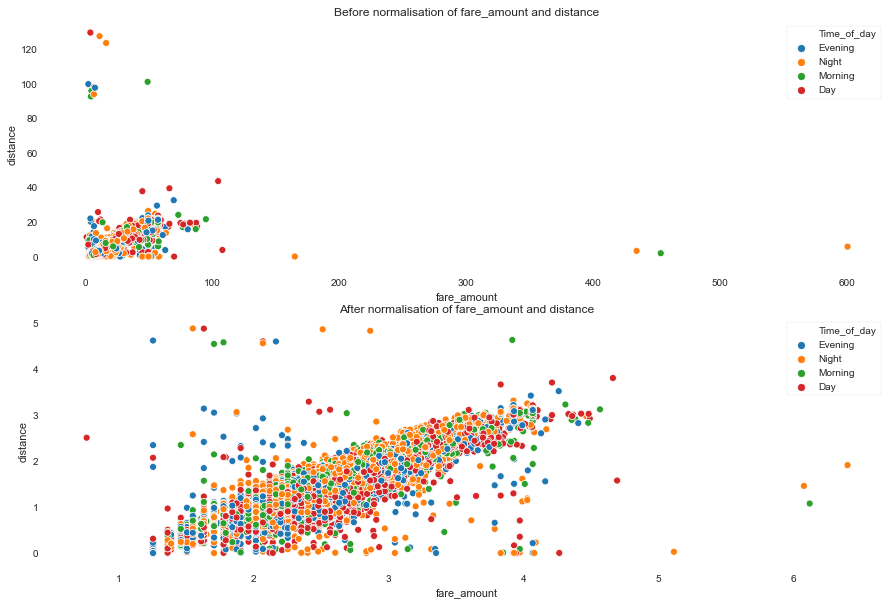

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(x='fare_amount',y='distance',hue='Time_of_day',data=train)
plt.title('Before normalisation of fare_amount and distance')
plt.legend(loc='best');
plt.subplot(2,1,2)
sns.scatterplot(x='fare_amount',y='distance',hue='Time_of_day',data=ctrain)
plt.title('After normalisation of fare_amount and distance')
plt.legend(loc='best');

C:\Users\peddi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


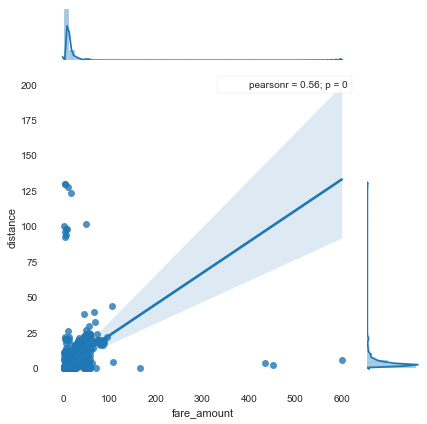

In [391]:
plotreg = sns.jointplot(x='fare_amount',y='distance',data=train,kind = 'reg')
plotreg.annotate(stats.pearsonr)
# plt.savefig('jointct.png')
plt.show()

In [132]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
Year                   int64
Month                  int64
Date                   int64
Hour                   int64
Minute                 int64
Dayofweek              int64
Dayofyear              int64
distance             float64
Time_of_day           object
dtype: object

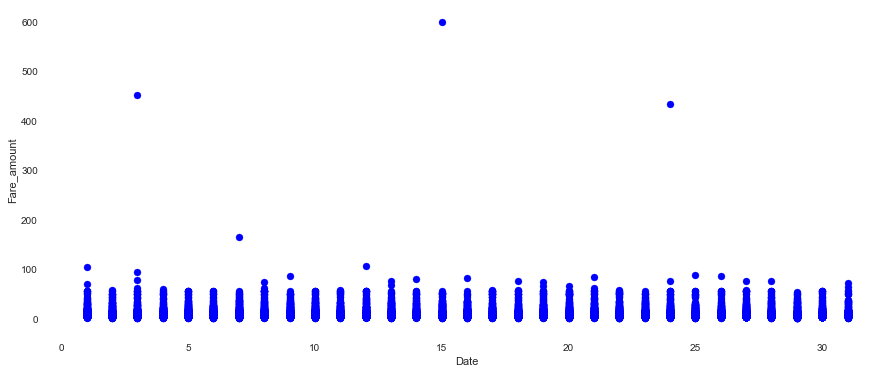

In [408]:
# relationship between date and fare amount.
plt.figure(figsize=(15,6));
plt.scatter(x="Date",y="fare_amount", data=train,color='blue');
plt.xlabel('Date');
plt.ylabel('Fare_amount');
plt.show();

In [133]:
#train['passenger_count']=train['passenger_count'].astype('int64')

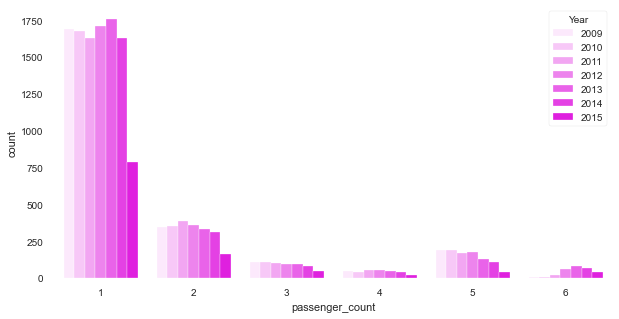

In [134]:
plt.figure(figsize=(10,5));
sns.countplot(x='passenger_count',hue='Year',data=train,color='magenta');

(array([1341.,  480.,  481., 2047., 1360., 1520., 2117., 1703., 1872.,
        2504.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

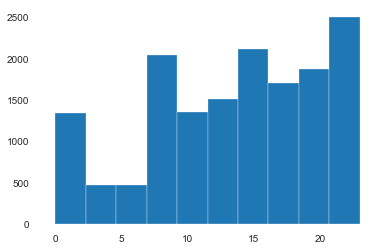

In [410]:
# number of cabs with respect to hours.  .
plt.hist(train["Hour"])

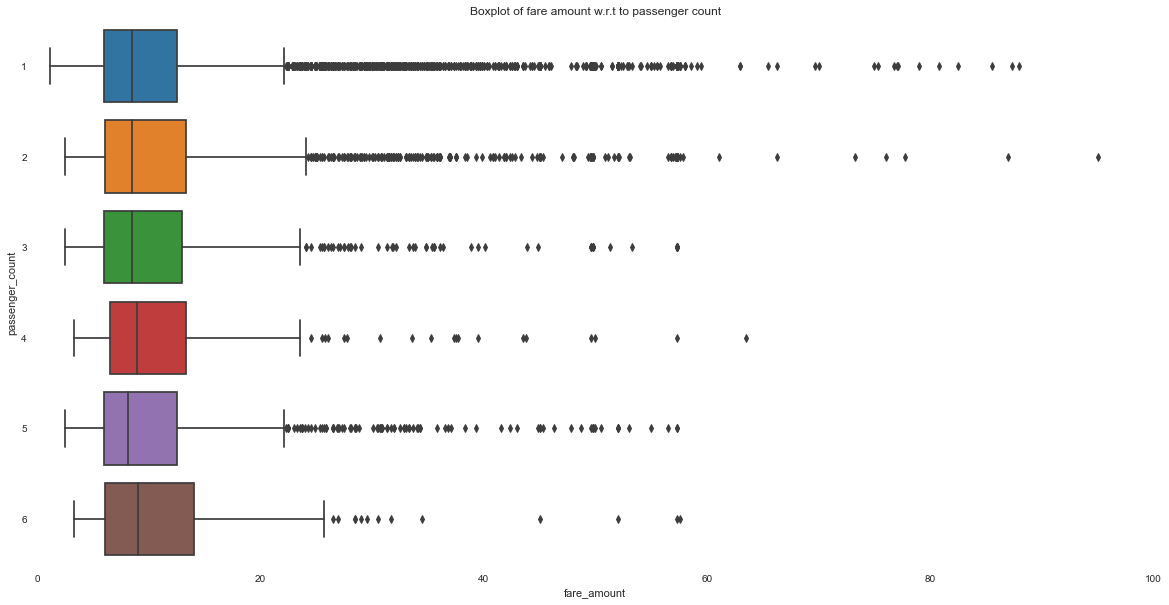

In [135]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],y=train['passenger_count'],orient='h');
plt.title('Boxplot of fare amount w.r.t to passenger count');
plt.show();

C:\Users\peddi\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\peddi\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

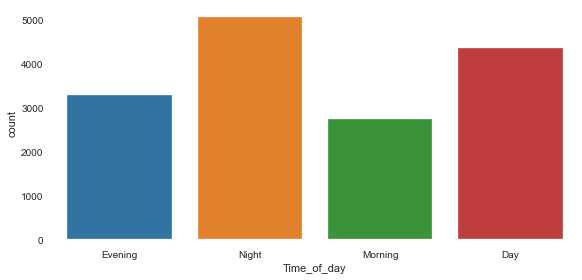

In [136]:
plt.figure(figsize=(15,10));
sns.factorplot(data=train,x='Time_of_day',kind='count',size=4,aspect=2);

In [417]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Hour', 'Minute', 'Dayofweek', 'Dayofyear', 'distance',
       'Time_of_day', 'Season', 'Weektype', 'WeekinMonth', 'MonDays'],
      dtype='object')

<Figure size 576x432 with 0 Axes>

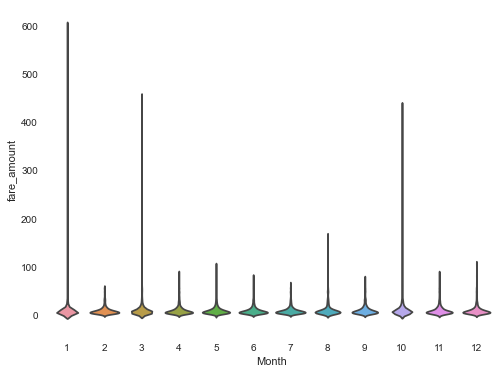

In [425]:
plt.figure(figsize=(8,6));
sns.violinplot(x="Month", y="fare_amount", data=train, inner=None)

<Figure size 576x432 with 0 Axes>

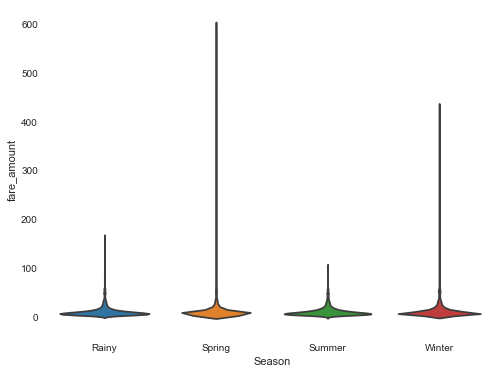

In [427]:
plt.figure(figsize=(8,6));
sns.violinplot(x="Season", y="fare_amount", data=train, inner=None)

In [137]:
# Adding a new column time of season in training set
for i in range(train.shape[0]):
    if (train.loc[i,'Month']>=1 and train.loc[i,'Month']<=3):
        train.loc[i,'Season']='Spring'
    elif (train.loc[i,'Month']>3 and train.loc[i,'Month']<=5):
        train.loc[i,'Season']='Summer'
    elif (train.loc[i,'Month']>5 and train.loc[i,'Month']<=8):
        train.loc[i,'Season']='Rainy'
    else:
        train.loc[i,'Season']='Winter'

In [138]:
train['Season'].value_counts()

Winter    4802
Spring    4129
Rainy     3652
Summer    2842
Name: Season, dtype: int64

In [139]:
# Adding a new column time of season in training set
for i in range(train.shape[0]):
    if (train.loc[i,'Dayofweek']>=0 and train.loc[i,'Dayofweek']<=4):
        train.loc[i,'Weektype']='Weekday'
    else:
        train.loc[i,'Weektype']='Weekend'

In [140]:
train['Weektype'].value_counts()

Weekday    10974
Weekend     4451
Name: Weektype, dtype: int64

In [141]:
# Adding a new column Week in month in training set
for i in range(train.shape[0]):
    if (train.loc[i,'Date']>=1 and train.loc[i,'Date']<=7):
        train.loc[i,'WeekinMonth']='First'
    elif (train.loc[i,'Date']>7 and train.loc[i,'Date']<=14):
        train.loc[i,'WeekinMonth']='Second'
    elif (train.loc[i,'Date']>14 and train.loc[i,'Date']<=21):
        train.loc[i,'WeekinMonth']='Third'
    else:
        train.loc[i,'WeekinMonth']='Last'

In [142]:
train['WeekinMonth'].value_counts()

Last      4683
Second    3651
Third     3625
First     3466
Name: WeekinMonth, dtype: int64

In [143]:
# Adding a new column MonDays in training set
for i in range(train.shape[0]):
    if (train.loc[i,'Date']>=1 and train.loc[i,'Date']<=15):
        train.loc[i,'MonDays']='Firsthalf'
    else:
        train.loc[i,'MonDays']='Secondhalf'

In [144]:
train['MonDays'].value_counts()

Secondhalf    7799
Firsthalf     7626
Name: MonDays, dtype: int64

In [145]:
train['Date'].unique()

array([15,  5, 18, 21,  9,  6, 20,  4,  2,  8, 19, 22,  7, 12, 10, 28, 11,
       24, 29, 31,  1, 14, 23, 16, 17, 27,  3, 25, 30, 26, 13],
      dtype=int64)

In [146]:
#train.drop('DateinMonth',axis=1,inplace=True)

In [147]:
train.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
0         40.712278                1  2009      6    15    17      26   
1         40.782004                1  2010      1     5    16      52   
2         40.750562                2  2011      8    18     0      35   
3         40.758092                1  2012      4    21     4      30   
4         40.783762                1  2010      3     9     7      51   

   Dayofweek  Dayofyear  distance Time_of_day  Season Weektype WeekinMonth  \
0          0        166  1.030764     Evening   Rainy  Weekday       Third   
1          1          5  8.450134     Evening  Spring  Weekday       First   
2          3        230  1.389525       Night   Rainy  Weekday       Third   
3          5        112  2.799270     Morning  Summer  Weekend       Third   
4          1         68  1.999157     Morning  Spring  Weekday      Second   

      MonDays  
0   Firsthalf  
1   Firsthalf  
2  Secondhalf  
3  Secondhalf  
4   Firsthalf

### Feature selection

In [148]:
# Creating another variable for performing feature selection and keeping the old variable same
ctrain=train.copy() 

In [149]:
train.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
0         40.712278                1  2009      6    15    17      26   
1         40.782004                1  2010      1     5    16      52   
2         40.750562                2  2011      8    18     0      35   
3         40.758092                1  2012      4    21     4      30   
4         40.783762                1  2010      3     9     7      51   

   Dayofweek  Dayofyear  distance Time_of_day  Season Weektype WeekinMonth  \
0          0        166  1.030764     Evening   Rainy  Weekday       Third   
1          1          5  8.450134     Evening  Spring  Weekday       First   
2          3        230  1.389525       Night   Rainy  Weekday       Third   
3          5        112  2.799270     Morning  Summer  Weekend       Third   
4          1         68  1.999157     Morning  Spring  Weekday      Second   

      MonDays  
0   Firsthalf  
1   Firsthalf  
2  Secondhalf  
3  Secondhalf  
4   Firsthalf

In [150]:
ctrain.shape

(15425, 19)

In [152]:
# Replacing string with integers in time_of_day in training set
ctrain['Time_of_day']=ctrain['Time_of_day'].map({'Morning':0,'Day':1,'Evening':2,'Night':3})

In [153]:
# Replacing string with integers in Season in training set
ctrain['Season']=ctrain['Season'].map({'Winter':0,'Spring':1,'Rainy':2,'Summer':3})

In [154]:
# Replacing string with integers in Weektype in training set
ctrain['Weektype']=ctrain['Weektype'].map({'Weekday':0,'Weekend':1})

In [155]:
# Replacing string with integers in Month in training set
ctrain['WeekinMonth']=ctrain['WeekinMonth'].map({'First':0,'Second':1,'Third':2,'Last':3})

In [156]:
# Replacing string with integers in Date in training set
ctrain['MonDays']=ctrain['MonDays'].map({'Firsthalf':0,'Secondhalf':1})

In [157]:
ctrain.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Date  Hour  Minute  \
0         40.712278                1  2009      6    15    17      26   
1         40.782004                1  2010      1     5    16      52   
2         40.750562                2  2011      8    18     0      35   
3         40.758092                1  2012      4    21     4      30   
4         40.783762                1  2010      3     9     7      51   

   Dayofweek  Dayofyear  distance  Time_of_day  Season  Weektype  WeekinMonth  \
0          0        166  1.030764            2       2         0            2   
1          1          5  8.450134            2       1         0            0   
2          3        230  1.389525            3       2         0            2   
3          5        112  2.799270            0       3         1            2   
4          1         68  1.999157            0       1         0            1   

   MonDays  
0        0  
1        0  
2        1  
3        1  
4        0

In [158]:
ctrain.drop(columns=['Month','Date','Hour','Minute','Dayofweek','Dayofyear'],axis=1,inplace=True)

In [159]:
ctrain.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  distance  Time_of_day  Season  \
0         40.712278                1  2009  1.030764            2       2   
1         40.782004                1  2010  8.450134            2       1   
2         40.750562                2  2011  1.389525            3       2   
3         40.758092                1  2012  2.799270            0       3   
4         40.783762                1  2010  1.999157            0       1   

   Weektype  WeekinMonth  MonDays  
0         0            2        0  
1         0            0        0  
2         0            2        1  
3         1            2        1  
4         0            1        0

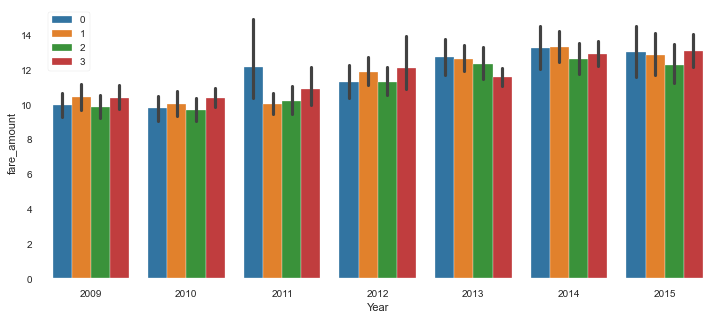

In [160]:
plt.figure(figsize=(12,5))
sns.barplot(y='fare_amount',x='Year',hue='Time_of_day',data=ctrain)
plt.legend(loc=2);

In [161]:
ctrain['passenger_count'].value_counts()

1    10883
2     2260
5     1016
3      655
4      317
6      294
Name: passenger_count, dtype: int64

In [162]:
ctrain.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
Year                   int64
distance             float64
Time_of_day            int64
Season                 int64
Weektype               int64
WeekinMonth            int64
MonDays                int64
dtype: object

In [163]:
ctrain.drop(columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [164]:
ctrain.columns

Index(['fare_amount', 'passenger_count', 'Year', 'distance', 'Time_of_day',
       'Season', 'Weektype', 'WeekinMonth', 'MonDays'],
      dtype='object')

In [165]:
ctrain['Time_of_day']=ctrain['Time_of_day'].astype(object)
#test['Time_of_day']=test['Time_of_day'].astype(str)

In [166]:
# converting passenger_count from numeric to object datatype because these passengers cannot be more than 8 and I decided
#             to keep them in these categories so this will be categorical and is of nominal type as 6 passengers are not
#                      greater than 1,2,3,4,5 in the cab rides 
ctrain['passenger_count']=ctrain['passenger_count'].astype(object)

In [167]:
ctrain['Year']=ctrain['Year'].astype(object)

In [168]:
ctrain['Time_of_day']=ctrain['Time_of_day'].astype(object)

In [169]:
ctrain['Season']=ctrain['Season'].astype(object)

In [170]:
ctrain['Weektype']=ctrain['Weektype'].astype(object)

In [171]:
ctrain['WeekinMonth']=ctrain['WeekinMonth'].astype(object)

In [172]:
ctrain['MonDays']=ctrain['MonDays'].astype(object)

In [173]:
#one way anova

In [174]:
ctrain.dtypes

fare_amount        float64
passenger_count     object
Year                object
distance           float64
Time_of_day         object
Season              object
Weektype            object
WeekinMonth         object
MonDays             object
dtype: object

In [175]:
ctrain.isnull().sum()

fare_amount        0
passenger_count    0
Year               0
distance           0
Time_of_day        0
Season             0
Weektype           0
WeekinMonth        0
MonDays            0
dtype: int64

In [176]:
ctrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15425 non-null  float64
 1   passenger_count  15425 non-null  object 
 2   Year             15425 non-null  object 
 3   distance         15425 non-null  float64
 4   Time_of_day      15425 non-null  object 
 5   Season           15425 non-null  object 
 6   Weektype         15425 non-null  object 
 7   WeekinMonth      15425 non-null  object 
 8   MonDays          15425 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [177]:
ctrain.columns

Index(['fare_amount', 'passenger_count', 'Year', 'distance', 'Time_of_day',
       'Season', 'Weektype', 'WeekinMonth', 'MonDays'],
      dtype='object')

In [178]:
ctrain['Time_of_day'].value_counts()

3    5047
1    4360
2    3290
0    2728
Name: Time_of_day, dtype: int64

In [179]:
ctrain['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4], dtype=object)

In [180]:
cat_names=['passenger_count','Year','Time_of_day','Season','Weektype','WeekinMonth','MonDays']

In [181]:
dtrain=pd.get_dummies(data=ctrain,columns=cat_names,drop_first=True)

In [182]:
dtrain.head()

fare_amount  distance  passenger_count_2  passenger_count_3  \
0          4.5  1.030764                  0                  0   
1         16.9  8.450134                  0                  0   
2          5.7  1.389525                  1                  0   
3          7.7  2.799270                  0                  0   
4          5.3  1.999157                  0                  0   

   passenger_count_4  passenger_count_5  passenger_count_6  Year_2010  \
0                  0                  0                  0          0   
1                  0                  0                  0          1   
2                  0                  0                  0          0   
3                  0                  0                  0          0   
4                  0                  0                  0          1   

   Year_2011  Year_2012  ...  Time_of_day_2  Time_of_day_3  Season_1  \
0          0          0  ...              1              0         0   
1          0          0  ...              1              0         1   
2          1          0  ...              0              1         0   
3          0          1  ...              0              0         0   
4          0          0  ...              0              0         1   

   Season_2  Season_3  Weektype_1  WeekinMonth_1  WeekinMonth_2  \
0         1         0           0              0              1   
1         0         0           0              0              0   
2         1         0           0              0              1   
3         0         1           1              0              1   
4         0         0           0              1              0   

   WeekinMonth_3  MonDays_1  
0              0          0  
1              0          0  
2              0          1  
3              0          1  
4              0          0  

[5 rows x 24 columns]

In [183]:
ctrain.head()

fare_amount passenger_count  Year  distance Time_of_day Season Weektype  \
0          4.5               1  2009  1.030764           2      2        0   
1         16.9               1  2010  8.450134           2      1        0   
2          5.7               2  2011  1.389525           3      2        0   
3          7.7               1  2012  2.799270           0      3        1   
4          5.3               1  2010  1.999157           0      1        0   

  WeekinMonth MonDays  
0           2       0  
1           0       0  
2           2       1  
3           2       1  
4           1       0

In [184]:
dtrain.shape

(15425, 24)

In [185]:
dtrain.isnull().sum()

fare_amount          0
distance             0
passenger_count_2    0
passenger_count_3    0
passenger_count_4    0
passenger_count_5    0
passenger_count_6    0
Year_2010            0
Year_2011            0
Year_2012            0
Year_2013            0
Year_2014            0
Year_2015            0
Time_of_day_1        0
Time_of_day_2        0
Time_of_day_3        0
Season_1             0
Season_2             0
Season_3             0
Weektype_1           0
WeekinMonth_1        0
WeekinMonth_2        0
WeekinMonth_3        0
MonDays_1            0
dtype: int64

In [186]:
dtrain.describe()

fare_amount      distance  passenger_count_2  passenger_count_3  \
count  15425.000000  15425.000000       15425.000000       15425.000000   
mean      11.409364      3.442921           0.146515           0.042464   
std       11.678935      4.597128           0.353634           0.201651   
min        1.140000      0.000111           0.000000           0.000000   
25%        6.000000      1.277983           0.000000           0.000000   
50%        8.500000      2.191595           0.000000           0.000000   
75%       12.500000      3.937812           0.000000           0.000000   
max      600.000000    129.950482           1.000000           1.000000   

       passenger_count_4  passenger_count_5  passenger_count_6     Year_2010  \
count       15425.000000       15425.000000        15425.00000  15425.000000   
mean            0.020551           0.065867            0.01906      0.154554   
std             0.141880           0.248058            0.13674      0.361491   
min             0.000000           0.000000            0.00000      0.000000   
25%             0.000000           0.000000            0.00000      0.000000   
50%             0.000000           0.000000            0.00000      0.000000   
75%             0.000000           0.000000            0.00000      0.000000   
max             1.000000           1.000000            1.00000      1.000000   

          Year_2011     Year_2012  ...  Time_of_day_2  Time_of_day_3  \
count  15425.000000  15425.000000  ...   15425.000000   15425.000000   
mean       0.153776      0.159287  ...       0.213290       0.327196   
std        0.360746      0.365955  ...       0.409644       0.469205   
min        0.000000      0.000000  ...       0.000000       0.000000   
25%        0.000000      0.000000  ...       0.000000       0.000000   
50%        0.000000      0.000000  ...       0.000000       0.000000   
75%        0.000000      0.000000  ...       0.000000       1.000000   
max        1.000000      1.000000  ...       1.000000       1.000000   

           Season_1      Season_2      Season_3    Weektype_1  WeekinMonth_1  \
count  15425.000000  15425.000000  15425.000000  15425.000000   15425.000000   
mean       0.267682      0.236759      0.184246      0.288558       0.236694   
std        0.442765      0.425107      0.387698      0.453106       0.425066   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        1.000000      0.000000      0.000000      1.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       WeekinMonth_2  WeekinMonth_3     MonDays_1  
count   15425.000000   15425.000000  15425.000000  
mean        0.235008       0.303598      0.505608  
std         0.424018       0.459826      0.499985  
min         0.000000       0.000000      0.000000  
25%         0.000000       0.000000      0.000000  
50%         0.000000       0.000000      1.000000  
75%         0.000000       1.000000      1.000000  
max         1.000000       1.000000      1.000000  

[8 rows x 24 columns]

In [187]:
dtrain.dtypes

fare_amount          float64
distance             float64
passenger_count_2      uint8
passenger_count_3      uint8
passenger_count_4      uint8
passenger_count_5      uint8
passenger_count_6      uint8
Year_2010              uint8
Year_2011              uint8
Year_2012              uint8
Year_2013              uint8
Year_2014              uint8
Year_2015              uint8
Time_of_day_1          uint8
Time_of_day_2          uint8
Time_of_day_3          uint8
Season_1               uint8
Season_2               uint8
Season_3               uint8
Weektype_1             uint8
WeekinMonth_1          uint8
WeekinMonth_2          uint8
WeekinMonth_3          uint8
MonDays_1              uint8
dtype: object

#### Analysis of Variance(Anova) Test
- It is carried out to compare between each groups in a categorical variable.
- ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.
- Hypothesis testing :
- Null Hypothesis: mean of all categories in a variable are same.
- Alternate Hypothesis: mean of at least one category in a variable is different.
- If p-value is less than 0.05 then we reject the null hypothesis.
- And if p-value is greater than 0.05 then we accept the null hypothesis.

In [392]:
dtrain.columns

Index(['fare_amount', 'distance', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Time_of_day_1', 'Time_of_day_2', 'Time_of_day_3',
       'Season_1', 'Season_2', 'Season_3', 'Weektype_1', 'WeekinMonth_1',
       'WeekinMonth_2', 'WeekinMonth_3', 'MonDays_1'],
      dtype='object')

In [396]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Hour', 'Minute', 'Dayofweek', 'Dayofyear', 'distance',
       'Time_of_day', 'Season', 'Weektype', 'WeekinMonth', 'MonDays'],
      dtype='object')

In [397]:
anova=ols('fare_amount~C(passenger_count_2)+ C(passenger_count_3)+C(passenger_count_4)+ C(passenger_count_5)+ C(passenger_count_6)\
     +C(Year_2010)+ C(Year_2011)+ C(Year_2012)+ C(Year_2013)+ C(Year_2014)+C(Year_2015)+ C(Time_of_day_1)+ C(Time_of_day_2)\
     +C(Time_of_day_3)+C(Season_1)+ C(Season_2)+ C(Season_3)+ C(Weektype_1)+ C(WeekinMonth_1)+C(WeekinMonth_2)+ C(WeekinMonth_3)+\
     C(MonDays_1)',data=dtrain).fit()
anova_table = sm.stats.anova_lm(anova)
anova_table

df        sum_sq      mean_sq          F  \
C(passenger_count_2)      1.0  2.450022e+03  2450.021679  18.171024   
C(passenger_count_3)      1.0  6.986111e+01    69.861110   0.518137   
C(passenger_count_4)      1.0  4.065268e+00     4.065268   0.030151   
C(passenger_count_5)      1.0  2.503533e+01    25.035326   0.185679   
C(passenger_count_6)      1.0  1.068370e+01    10.683697   0.079238   
C(Year_2010)              1.0  5.515785e+03  5515.785102  40.908806   
C(Year_2011)              1.0  2.727091e+03  2727.091075  20.225959   
C(Year_2012)              1.0  9.068634e+01    90.686342   0.672591   
C(Year_2013)              1.0  3.238908e+02   323.890782   2.402194   
C(Year_2014)              1.0  5.542675e+03  5542.674837  41.108239   
C(Year_2015)              1.0  5.310614e+03  5310.613893  39.387117   
C(Time_of_day_1)          1.0  3.502846e+01    35.028464   0.259795   
C(Time_of_day_2)          1.0  4.679108e+02   467.910767   3.470344   
C(Time_of_day_3)          1.0  9.876683e+01    98.766832   0.732522   
C(Season_1)               1.0  1.618352e+03  1618.352092  12.002798   
C(Season_2)               1.0  7.555604e+02   755.560403   5.603749   
C(Season_3)               1.0  9.617337e+02   961.733654   7.132870   
C(Weektype_1)             1.0  4.113112e+00     4.113112   0.030506   
C(WeekinMonth_1)          1.0  1.531797e+02   153.179666   1.136084   
C(WeekinMonth_2)          1.0  1.572987e+02   157.298728   1.166634   
C(WeekinMonth_3)          1.0  1.010163e+02   101.016275   0.749205   
C(MonDays_1)              1.0  7.014354e+02   701.435351   5.202321   
Residual              15402.0  2.076671e+06   134.831240        NaN   

                            PR(>F)  
C(passenger_count_2)  2.031296e-05  
C(passenger_count_3)  4.716482e-01  
C(passenger_count_4)  8.621508e-01  
C(passenger_count_5)  6.665436e-01  
C(passenger_count_6)  7.783371e-01  
C(Year_2010)          1.641003e-10  
C(Year_2011)          6.931553e-06  
C(Year_2012)          4.121623e-01  
C(Year_2013)          1.211858e-01  
C(Year_2014)          1.482214e-10  
C(Year_2015)          3.568815e-10  
C(Time_of_day_1)      6.102684e-01  
C(Time_of_day_2)      6.249734e-02  
C(Time_of_day_3)      3.920803e-01  
C(Season_1)           5.326528e-04  
C(Season_2)           1.793438e-02  
C(Season_3)           7.576301e-03  
C(Weektype_1)         8.613502e-01  
C(WeekinMonth_1)      2.864979e-01  
C(WeekinMonth_2)      2.801108e-01  
C(WeekinMonth_3)      3.867414e-01  
C(MonDays_1)          2.257035e-02  
Residual                       NaN

- Every variable has p-value less than 0.05 therefore we reject the null hypothesis.

#### Multicollinearity Test
- VIF is always greater or equal to 1.
- if VIF is 1 --- Not correlated to any of the variables.
- if VIF is between 1-5 --- Moderately correlated.
- if VIF is above 5 --- Highly correlated.
- If there are multiple variables with VIF greater than 5, only remove the variable with the highest VIF.

In [404]:
outcomes,predictors=dmatrices('fare_amount~distance+passenger_count_2+ passenger_count_3+passenger_count_4+ passenger_count_5+ passenger_count_6\
     +Year_2010+ Year_2011+ Year_2012+ Year_2013+ Year_2014+Year_2015+ Time_of_day_1+ Time_of_day_2\
     +Time_of_day_3+Season_1+ Season_2+ Season_3+ Weektype_1+ WeekinMonth_1+WeekinMonth_2+ WeekinMonth_3+\
     MonDays_1',data=dtrain,return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

VIF           features
0   17.690610          Intercept
1    1.003882           distance
2    1.041204  passenger_count_2
3    1.019636  passenger_count_3
4    1.012160  passenger_count_4
5    1.025811  passenger_count_5
6    1.017622  passenger_count_6
7    1.686593          Year_2010
8    1.683966          Year_2011
9    1.706822          Year_2012
10   1.708181          Year_2013
11   1.663864          Year_2014
12   1.425382          Year_2015
13   1.882131      Time_of_day_1
14   1.748511      Time_of_day_2
15   1.958963      Time_of_day_3
16   1.418498           Season_1
17   1.354278           Season_2
18   1.343647           Season_3
19   1.022339         Weektype_1
20   1.569440      WeekinMonth_1
21   6.256976      WeekinMonth_2
22   9.104604      WeekinMonth_3
23   8.823592          MonDays_1

- VIF scores indicate most of the features have no or low multicollinearity

In [405]:
dtrain.head()

fare_amount  distance  passenger_count_2  passenger_count_3  \
0          4.5  1.030764                  0                  0   
1         16.9  8.450134                  0                  0   
2          5.7  1.389525                  1                  0   
3          7.7  2.799270                  0                  0   
4          5.3  1.999157                  0                  0   

   passenger_count_4  passenger_count_5  passenger_count_6  Year_2010  \
0                  0                  0                  0          0   
1                  0                  0                  0          1   
2                  0                  0                  0          0   
3                  0                  0                  0          0   
4                  0                  0                  0          1   

   Year_2011  Year_2012  ...  Time_of_day_2  Time_of_day_3  Season_1  \
0          0          0  ...              1              0         0   
1          0          0  ...              1              0         1   
2          1          0  ...              0              1         0   
3          0          1  ...              0              0         0   
4          0          0  ...              0              0         1   

   Season_2  Season_3  Weektype_1  WeekinMonth_1  WeekinMonth_2  \
0         1         0           0              0              1   
1         0         0           0              0              0   
2         1         0           0              0              1   
3         0         1           1              0              1   
4         0         0           0              1              0   

   WeekinMonth_3  MonDays_1  
0              0          0  
1              0          0  
2              0          1  
3              0          1  
4              0          0  

[5 rows x 24 columns]

In [406]:
dtrain['MonDays_1'].unique()

array([0, 1], dtype=uint8)

### EDA on test set

In [189]:
test.shape

(9914, 6)

In [190]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [191]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [192]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], errors='coerce',infer_datetime_format=True)

In [193]:
# Add datetime parameters for pickup_datetime
test["Year"] = test.pickup_datetime.dt.year
test["Month"] = test.pickup_datetime.dt.month
test["Date"] = test.pickup_datetime.dt.day
#train["Day"] = train.pickup_datetime.dt.day
test["Hour"]= test.pickup_datetime.dt.hour
test["Minute"]= test.pickup_datetime.dt.minute
test["Dayofweek"] = test.pickup_datetime.dt.dayofweek
test["Dayofyear"] = test.pickup_datetime.dt.dayofyear

In [194]:
# Drop original saledate
test.drop("pickup_datetime", axis=1, inplace=True)

In [195]:
test.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.973320        40.763805         -73.981430         40.743835   
1        -73.986862        40.719383         -73.998886         40.739201   
2        -73.982524        40.751260         -73.979654         40.746139   
3        -73.981160        40.767807         -73.990448         40.751635   
4        -73.966046        40.789775         -73.988565         40.744427   

   passenger_count  Year  Month  Date  Hour  Minute  Dayofweek  Dayofyear  
0                1  2015      1    27    13       8          1         27  
1                1  2015      1    27    13       8          1         27  
2                1  2011     10     8    11      53          5        281  
3                1  2012     12     1    21      12          5        336  
4                1  2012     12     1    21      12          5        336

In [196]:
#train['passenger_count']=train['passenger_count'].astype(int)

In [197]:
zero_passengers=test[test['passenger_count']==0]

In [198]:
zero_passengers.head()

Empty DataFrame
Columns: [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

In [199]:
test['passenger_count'].sort_values(ascending=False)

9913    6
9780    6
9800    6
9799    6
9798    6
       ..
4613    1
4614    1
4615    1
4616    1
0       1
Name: passenger_count, Length: 9914, dtype: int64

In [200]:
test['passenger_count'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [201]:
# Latitude and logitude are a pair of numbers used to describe a position on the plane of a geographic coordinate system
# The numbers are in decimal degrees format and range from -90 to +90 for latitude and -180 to +180 for logitude
# Hence lets check the correct latitude and logitude vallues in the dataset
test[(test['pickup_latitude']<-90)|(test['pickup_latitude']>90)]
test[(test['dropoff_latitude']<-90)|(test['dropoff_latitude']>90)]
test[(test['pickup_longitude']<-180)|(test['pickup_longitude']>180)]
test[(test['dropoff_longitude']<-180)|(test['dropoff_longitude']>180)]

Empty DataFrame
Columns: [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

Empty DataFrame
Columns: [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear]
Index: []

In [202]:
dup_test=test.copy()

In [203]:
# another method of finding outliers then I find most accurate way of finding outliers or defects or errors in
     #latitide and logitude values is possible by knowing the range of those values so I continue with that method
# The below method shows more outliers then these are not outliers because the region exists with these outliers
coutliers=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','Year',
       'Month', 'Date', 'Hour', 'Minute', 'Dayofweek', 'Dayofyear']
for l in coutliers:
    #extract quartiles
    q75,q25=np.percentile(dup_test[l],[75,25])
    #calculate IQR
    iqr=q75-q25
    #calculate inner and outer fence
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
    #replace with na
    dup_test.loc[dup_test[l]<minimum,l]=np.nan
    dup_test.loc[dup_test[l]>maximum,l]=np.nan
    #calculate missing value
    missing_value=pd.DataFrame(dup_test.isnull().sum())

In [204]:
missing_value

0
pickup_longitude   492
pickup_latitude    329
dropoff_longitude  545
dropoff_latitude   471
passenger_count      0
Year                 0
Month                0
Date                 0
Hour                 0
Minute               0
Dayofweek            0
Dayofyear            0

In [205]:
dup_test.dropna(inplace=True)

In [206]:
dup_test.shape

(8675, 12)

In [207]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [208]:
test.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.973320        40.763805         -73.981430         40.743835   
1        -73.986862        40.719383         -73.998886         40.739201   
2        -73.982524        40.751260         -73.979654         40.746139   
3        -73.981160        40.767807         -73.990448         40.751635   
4        -73.966046        40.789775         -73.988565         40.744427   

   passenger_count  Year  Month  Date  Hour  Minute  Dayofweek  Dayofyear  \
0                1  2015      1    27    13       8          1         27   
1                1  2015      1    27    13       8          1         27   
2                1  2011     10     8    11      53          5        281   
3                1  2012     12     1    21      12          5        336   
4                1  2012     12     1    21      12          5        336   

   distance  
0  2.323259  
1  2.425353  
2  0.618628  
3  1.961033  
4  5.387301

In [209]:
test['distance'].sort_values(ascending=False)

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
          ...    
8835     0.000000
943      0.000000
2258     0.000000
7637     0.000000
6335     0.000000
Name: distance, Length: 9914, dtype: float64

In [210]:
# there are some outliers in distance 
# there are many cabs travelling to greater distance so I am removing them the highest of >8000 km is not good travel in cab
# there are such outliers there are less some travels I am removing them
# In a city there will be max of 600-800 sq km so I am taking Hyd with 625 sq km and removing greater than that
#test.drop(test[test['distance']>=625].index,axis=0,inplace=True)

In [211]:
#test.reset_index(inplace=True,drop=True)

<Figure size 288x216 with 0 Axes>

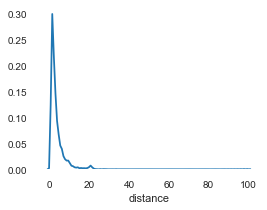

In [212]:
plt.figure(figsize=(4,3))
sns.distplot(test['distance'],hist=False)

In [213]:
test[test['distance']==0]

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
121         -73.980590        40.747682         -73.980590         40.747682   
279         -74.047394        40.785789         -74.047394         40.785789   
318         -73.985862        40.744027         -73.985862         40.744027   
417         -73.964615        40.777620         -73.964615         40.777620   
423         -73.955065        40.771505         -73.955065         40.771505   
...                ...              ...                ...               ...   
9478        -73.946078        40.749467         -73.946078         40.749467   
9500        -73.975767        40.752947         -73.975767         40.752947   
9563        -73.990780        40.724202         -73.990780         40.724202   
9830        -73.981425        40.773935         -73.981425         40.773935   
9888        -73.956488        40.767512         -73.956488         40.767512   

      passenger_count  Year  Month  Date  Hour  Minute  Dayofweek  Dayofyear  \
121                 1  2014      6    14    13      39          5        165   
279                 1  2010      9     5    22      31          6        248   
318                 1  2009      6    10    16      55          2        161   
417                 1  2011      6    24    12       3          4        175   
423                 1  2011      6    24    12       3          4        175   
...               ...   ...    ...   ...   ...     ...        ...        ...   
9478                5  2011     12    13    22       0          1        347   
9500                5  2014      7    21    18      19          0        202   
9563                5  2011      3     6    21       1          6         65   
9830                6  2014      7    21    18      19          0        202   
9888                6  2013      9    25    22       0          2        268   

      distance  
121        0.0  
279        0.0  
318        0.0  
417        0.0  
423        0.0  
...        ...  
9478       0.0  
9500       0.0  
9563       0.0  
9830       0.0  
9888       0.0  

[85 rows x 13 columns]

In [214]:
test.drop(test[test['distance']==0].index,axis=0,inplace=True)

In [215]:
test[test['distance']==0]

Empty DataFrame
Columns: [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, Year, Month, Date, Hour, Minute, Dayofweek, Dayofyear, distance]
Index: []

<Figure size 288x216 with 0 Axes>

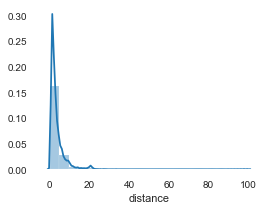

In [216]:
plt.figure(figsize=(4,3))
sns.distplot(test['distance'],hist=True,kde=True,bins=20)

In [217]:
test['distance'].sort_values(ascending=False)

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
          ...    
7966     0.007370
6230     0.003598
6901     0.002657
2513     0.002166
352      0.001486
Name: distance, Length: 9829, dtype: float64

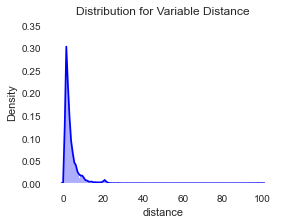

In [218]:
#Normality check of training data is uniformly distributed or not-
plt.figure(figsize=(4,3))
sns.distplot(test['distance'],bins='auto',color='blue')
plt.title("Distribution for Variable Distance")
plt.ylabel("Density")
plt.show();

<Figure size 288x216 with 0 Axes>

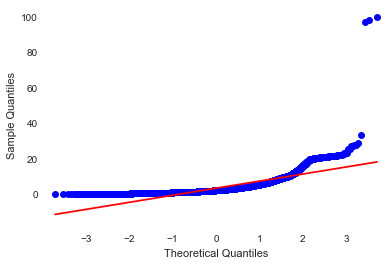

In [219]:
plt.figure(figsize=(4,3))
sm.qqplot(test['distance'],line='s')
plt.show();

In [220]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
#test['distance'] = np.log1p(test['distance'])

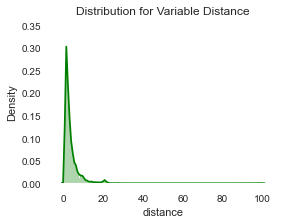

In [221]:
plt.figure(figsize=(4,3))
sns.distplot(test['distance'],bins='auto',color='green');
plt.title("Distribution for Variable Distance");
plt.ylabel("Density");
plt.show();

In [222]:
test.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.973320        40.763805         -73.981430         40.743835   
1        -73.986862        40.719383         -73.998886         40.739201   
2        -73.982524        40.751260         -73.979654         40.746139   
3        -73.981160        40.767807         -73.990448         40.751635   
4        -73.966046        40.789775         -73.988565         40.744427   

   passenger_count  Year  Month  Date  Hour  Minute  Dayofweek  Dayofyear  \
0                1  2015      1    27    13       8          1         27   
1                1  2015      1    27    13       8          1         27   
2                1  2011     10     8    11      53          5        281   
3                1  2012     12     1    21      12          5        336   
4                1  2012     12     1    21      12          5        336   

   distance  
0  2.323259  
1  2.425353  
2  0.618628  
3  1.961033  
4  5.387301

In [223]:
test.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Year                   int64
Month                  int64
Date                   int64
Hour                   int64
Minute                 int64
Dayofweek              int64
Dayofyear              int64
distance             float64
dtype: object

In [224]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Date', 'Hour',
       'Minute', 'Dayofweek', 'Dayofyear', 'distance'],
      dtype='object')

In [225]:
test['Hour'].unique()

array([13, 11, 21, 12, 15, 20,  3, 16,  2,  9,  0,  8, 19, 18, 14, 23, 10,
       22,  4,  7,  6,  5, 17,  1], dtype=int64)

In [226]:
test['Hour'].dtype

dtype('int64')

In [227]:
test.reset_index(inplace=True,drop=True)

In [228]:
# Adding a new column time of day in test set
for i in range(test.shape[0]):
    if (test.loc[i,'Hour']>3 and test.loc[i,'Hour']<=9):
        test.loc[i,'Time_of_day']='Morning'
    elif (test.loc[i,'Hour']>9 and test.loc[i,'Hour']<=15):
        test.loc[i,'Time_of_day']='Day'
    elif (test.loc[i,'Hour']>15 and test.loc[i,'Hour']<=19):
        test.loc[i,'Time_of_day']='Evening'
    else:
        test.loc[i,'Time_of_day']='Night'

In [229]:
# Adding a new column time of season in test set
for i in range(test.shape[0]):
    if (test.loc[i,'Month']>=1 and test.loc[i,'Month']<=3):
        test.loc[i,'Season']='Spring'
    elif (test.loc[i,'Month']>3 and test.loc[i,'Month']<=5):
        test.loc[i,'Season']='Summer'
    elif (test.loc[i,'Month']>5 and test.loc[i,'Month']<=8):
        test.loc[i,'Season']='Rainy'
    else:
        test.loc[i,'Season']='Winter'

In [230]:
test['Season'].value_counts()

Winter    3690
Rainy     2878
Spring    2085
Summer    1176
Name: Season, dtype: int64

In [231]:
# Adding a new column time of season in test set
for i in range(test.shape[0]):
    if (test.loc[i,'Dayofweek']>=0 and test.loc[i,'Dayofweek']<=4):
        test.loc[i,'Weektype']='Weekday'
    else:
        test.loc[i,'Weektype']='Weekend'

In [232]:
test['Weektype'].value_counts()

Weekday    7154
Weekend    2675
Name: Weektype, dtype: int64

In [233]:
# Adding a new column time of season in training set
for i in range(test.shape[0]):
    if (test.loc[i,'Date']>=1 and test.loc[i,'Date']<=7):
        test.loc[i,'WeekinMonth']='First'
    elif (test.loc[i,'Date']>7 and test.loc[i,'Date']<=14):
        test.loc[i,'WeekinMonth']='Second'
    elif (test.loc[i,'Date']>14 and test.loc[i,'Date']<=21):
        test.loc[i,'WeekinMonth']='Third'
    else:
        test.loc[i,'WeekinMonth']='Last'

In [234]:
# Adding a new column time of season in training set
for i in range(test.shape[0]):
    if (test.loc[i,'Date']>=1 and test.loc[i,'Date']<=15):
        test.loc[i,'MonDays']='Firsthalf'
    else:
        test.loc[i,'MonDays']='Secondhalf'

In [235]:
test.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.973320        40.763805         -73.981430         40.743835   
1        -73.986862        40.719383         -73.998886         40.739201   
2        -73.982524        40.751260         -73.979654         40.746139   
3        -73.981160        40.767807         -73.990448         40.751635   
4        -73.966046        40.789775         -73.988565         40.744427   

   passenger_count  Year  Month  Date  Hour  Minute  Dayofweek  Dayofyear  \
0                1  2015      1    27    13       8          1         27   
1                1  2015      1    27    13       8          1         27   
2                1  2011     10     8    11      53          5        281   
3                1  2012     12     1    21      12          5        336   
4                1  2012     12     1    21      12          5        336   

   distance Time_of_day  Season Weektype WeekinMonth     MonDays  
0  2.323259         Day  Spring  Weekday        Last  Secondhalf  
1  2.425353         Day  Spring  Weekday        Last  Secondhalf  
2  0.618628         Day  Winter  Weekend      Second   Firsthalf  
3  1.961033       Night  Winter  Weekend       First   Firsthalf  
4  5.387301       Night  Winter  Weekend       First   Firsthalf

In [236]:
ctest=test.copy()

In [237]:
# Replacing string with integers in time_of_day in test set
ctest['Time_of_day']=ctest['Time_of_day'].map({'Morning':0,'Day':1,'Evening':2,'Night':3})
# Replacing string with integers in Season in test set
ctest['Season']=ctest['Season'].map({'Winter':0,'Spring':1,'Rainy':2,'Summer':3})
# Replacing string with integers in Weektype in test set
ctest['Weektype']=ctest['Weektype'].map({'Weekday':0,'Weekend':1})
# Replacing string with integers in Month in test set
ctest['WeekinMonth']=ctest['WeekinMonth'].map({'First':0,'Second':1,'Third':2,'Last':3})
# Replacing string with integers in Date in test set
ctest['MonDays']=ctest['MonDays'].map({'Firsthalf':0,'Secondhalf':1})

In [238]:
ctest.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.973320        40.763805         -73.981430         40.743835   
1        -73.986862        40.719383         -73.998886         40.739201   
2        -73.982524        40.751260         -73.979654         40.746139   
3        -73.981160        40.767807         -73.990448         40.751635   
4        -73.966046        40.789775         -73.988565         40.744427   

   passenger_count  Year  Month  Date  Hour  Minute  Dayofweek  Dayofyear  \
0                1  2015      1    27    13       8          1         27   
1                1  2015      1    27    13       8          1         27   
2                1  2011     10     8    11      53          5        281   
3                1  2012     12     1    21      12          5        336   
4                1  2012     12     1    21      12          5        336   

   distance  Time_of_day  Season  Weektype  WeekinMonth  MonDays  
0  2.323259            1       1         0            3        1  
1  2.425353            1       1         0            3        1  
2  0.618628            1       0         1            1        0  
3  1.961033            3       0         1            0        0  
4  5.387301            3       0         1            0        0

In [239]:
ctest.shape

(9829, 18)

In [240]:
ctest.drop(columns=['Month','Date','Hour','Minute','Dayofweek','Dayofyear'],axis=1,inplace=True)

In [241]:
ctest.drop(columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [242]:
ctest.dtypes

passenger_count      int64
Year                 int64
distance           float64
Time_of_day          int64
Season               int64
Weektype             int64
WeekinMonth          int64
MonDays              int64
dtype: object

In [243]:
ctest['Time_of_day']=ctest['Time_of_day'].astype(object)
ctest['passenger_count']=ctest['passenger_count'].astype(object)
ctest['Year']=ctest['Year'].astype(object)
ctest['Time_of_day']=ctest['Time_of_day'].astype(object)
ctest['Season']=ctest['Season'].astype(object)
ctest['Weektype']=ctest['Weektype'].astype(object)
ctest['WeekinMonth']=ctest['WeekinMonth'].astype(object)
ctest['MonDays']=ctest['MonDays'].astype(object)

In [244]:
ctest.head()

passenger_count  Year  distance Time_of_day Season Weektype WeekinMonth  \
0               1  2015  2.323259           1      1        0           3   
1               1  2015  2.425353           1      1        0           3   
2               1  2011  0.618628           1      0        1           1   
3               1  2012  1.961033           3      0        1           0   
4               1  2012  5.387301           3      0        1           0   

  MonDays  
0       1  
1       1  
2       0  
3       0  
4       0

In [245]:
ctest.shape

(9829, 8)

In [246]:
#cat_names=['passenger_count','Year','Time_of_day','Season','Weektype','WeekinMonth','MonDays']

In [247]:
dtest=pd.get_dummies(data=ctest,columns=cat_names,drop_first=True)

In [248]:
dtest.head()

distance  passenger_count_2  passenger_count_3  passenger_count_4  \
0  2.323259                  0                  0                  0   
1  2.425353                  0                  0                  0   
2  0.618628                  0                  0                  0   
3  1.961033                  0                  0                  0   
4  5.387301                  0                  0                  0   

   passenger_count_5  passenger_count_6  Year_2010  Year_2011  Year_2012  \
0                  0                  0          0          0          0   
1                  0                  0          0          0          0   
2                  0                  0          0          1          0   
3                  0                  0          0          0          1   
4                  0                  0          0          0          1   

   Year_2013  ...  Time_of_day_2  Time_of_day_3  Season_1  Season_2  Season_3  \
0          0  ...              0              0         1         0         0   
1          0  ...              0              0         1         0         0   
2          0  ...              0              0         0         0         0   
3          0  ...              0              1         0         0         0   
4          0  ...              0              1         0         0         0   

   Weektype_1  WeekinMonth_1  WeekinMonth_2  WeekinMonth_3  MonDays_1  
0           0              0              0              1          1  
1           0              0              0              1          1  
2           1              1              0              0          0  
3           1              0              0              0          0  
4           1              0              0              0          0  

[5 rows x 23 columns]

In [249]:
dtest.shape

(9829, 23)

In [250]:
dtest.dtypes

distance             float64
passenger_count_2      uint8
passenger_count_3      uint8
passenger_count_4      uint8
passenger_count_5      uint8
passenger_count_6      uint8
Year_2010              uint8
Year_2011              uint8
Year_2012              uint8
Year_2013              uint8
Year_2014              uint8
Year_2015              uint8
Time_of_day_1          uint8
Time_of_day_2          uint8
Time_of_day_3          uint8
Season_1               uint8
Season_2               uint8
Season_3               uint8
Weektype_1             uint8
WeekinMonth_1          uint8
WeekinMonth_2          uint8
WeekinMonth_3          uint8
MonDays_1              uint8
dtype: object

### Train and test split

In [251]:
x=dtrain.drop('fare_amount',axis=1)
y=dtrain['fare_amount']
print(x,y)

       distance  passenger_count_2  passenger_count_3  passenger_count_4  \
0      1.030764                  0                  0                  0   
1      8.450134                  0                  0                  0   
2      1.389525                  1                  0                  0   
3      2.799270                  0                  0                  0   
4      1.999157                  0                  0                  0   
...         ...                ...                ...                ...   
15420  3.357490                  0                  0                  0   
15421  0.850044                  0                  0                  0   
15422  7.867638                  1                  0                  0   
15423  1.469105                  0                  0                  0   
15424  2.590036                  0                  0                  0   

       passenger_count_5  passenger_count_6  Year_2010  Year_2011  Year_2012  \
0      

In [252]:
dtrain.shape

(15425, 24)

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(10797, 23) (4628, 23) (10797,) (4628,)


### Feature importances and Model building

In [254]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [255]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=1000,random_state=1)
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
print(pred1)

RandomForestRegressor(n_estimators=1000, random_state=1)

[ 5.2437  9.9426  6.1315 ...  4.4548 10.2843  4.945 ]


In [256]:
def rmse(y_test,pred):
    rmse=np.sqrt(mean_squared_error(y_test,pred1))
    return rmse

In [257]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [258]:
def adj_r_sq(x,y,r2):
    '''
    Returns a computed Adjusted R-Squared Coefficient.
    
    Parameters
    ----------
    X : Pandas DataFrame
        A pandas DataFrame including all the independant variables. Could be a series if there is only one predictor.
        
    Y : Pandas DataFrame or Series
        Labels or response variables 'Y'.
        
    r2 : float
        R-Squared Coefficient
    '''
    n = len(y)
    p = x.shape[1]
    adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

    return adj_r

In [259]:
x.shape

(15425, 23)

In [260]:
x_train.shape

(10797, 23)

In [261]:
rmse(y_test,pred1)

4.7119625812663255

In [262]:
r2_score(y_test,pred1)

0.7468222484373723

In [263]:
mape(y_test,pred1)

23.443578221077736

In [264]:
adj_r_sq(x_train,y_train,74.68)

74.83730437204122

In [265]:
features=pd.DataFrame()
features['Features']=x.columns
features['Support']=model1.feature_importances_
features.sort_values('Support',ascending=False,inplace=True)
features.set_index('Features',inplace=True)

In [266]:
features

Support
Features                   
distance           0.899302
WeekinMonth_2      0.009804
Year_2011          0.008397
Time_of_day_3      0.007426
Season_1           0.007300
Weektype_1         0.006735
Year_2012          0.006704
Year_2014          0.005624
Time_of_day_1      0.005238
MonDays_1          0.005116
Year_2010          0.004880
WeekinMonth_3      0.004543
WeekinMonth_1      0.004082
passenger_count_2  0.003864
Year_2013          0.003776
Season_3           0.003632
Time_of_day_2      0.003506
Season_2           0.003392
Year_2015          0.003141
passenger_count_5  0.001525
passenger_count_3  0.000842
passenger_count_6  0.000695
passenger_count_4  0.000476

In [267]:
features.shape

(23, 1)

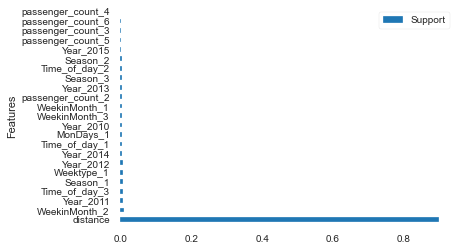

In [268]:
features.plot(kind='barh')

- From the above feature imortances obtained it is confirmed that distance plays an important role in cab fare prediction
- All the other variables play less importance in fare prediction
- After distance Seasons,Months and week days play its role as because of the peak hours or something they influence the cab fare prediction.
- Passenger count does not impact much compared to any other variable in cab fare prediction means the count of passengers does't impact the charge on them. Fare is only determined by seasonal and geopgraphical features mostly than any other.

In [269]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
print(pred2)

LinearRegression()

[ 9.23221843  9.6768108   8.86858794 ...  8.0181378  11.3994841
  7.7216501 ]


In [270]:
rmse(y_test,pred2)

4.7119625812663255

In [271]:
mape(y_test,pred2)

36.11254021516487

In [272]:
r2_score(y_test,pred2)

0.5597277280678216

In [273]:
adj_r_sq(x_train,y_train,55.98)

56.09738048825768

In [274]:
import statsmodels.api as sm
num=dtrain['distance']
tar=dtrain['fare_amount']
num=sm.add_constant(num)
lin_statmodel=sm.OLS(tar,num).fit()
lin_statpred=lin_statmodel.predict(num)
lin_statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     6991.
Date:                Fri, 28 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:03:51   Log-Likelihood:                -56915.
No. Observations:               15425   AIC:                         1.138e+05
Df Residuals:                   15423   BIC:                         1.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5244      0.097     66.946      0.000       6.333       6.715
distance       1.4188      0.017     83.613      0.000       1.386       1.452
==============================================================================
Omnibus:                    36959.765   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1327721325.627
Skew:                          24.057   Prob(JB):                         0.00
Kurtosis:                    1439.491   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Here I have used stats model and OLS method for getting some statistics for the data. As this is the regression dataset and after cleaning there are many categorical variables than numeric so with the numeric data applying OLS method.
- The results seems not so good as there is only one predictor for prediction it does't have much features and r2_score seems to be 0.312 whereas when Linear regression is applied on complete dataset r2_score is better it is 55.9%.
- Still this does not seem to be satisfactory for making predictions on test set. So the more advanced algorithms are being used for model building for better predictions on test set.
- AIC and BIC criterio are also found through this OLS method and is greater than 0.5 so the error or deviation seems to be high for the data. 
- Even the Skewness and Kurtosis are very high so there is more anomolies and differences in the data. 

In [275]:
print(lin_statpred)

0         7.986918
1        18.513761
2         8.495940
3        10.496132
4         9.360905
           ...    
15420    11.288153
15421     7.730507
15422    17.687297
15423     8.608851
15424    10.199264
Length: 15425, dtype: float64


In [276]:
r2_score(y,lin_statpred)

0.31190981534780704

In [277]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [278]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor(random_state=1,max_depth=4)
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)
print(pred3)

DecisionTreeRegressor(max_depth=4, random_state=1)

[ 6.1505505  10.10374293  6.1505505  ...  6.1505505   8.89164828
  6.1505505 ]


In [279]:
rmse(y_test,pred3)

4.7119625812663255

In [280]:
mape(y_test,pred3)

25.950804475619183

In [281]:
r2_score(y_test,pred3)

0.7703329189994881

In [282]:
adj_r_sq(x_train,y_train,77.03)

77.19232154460225

In [283]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

True

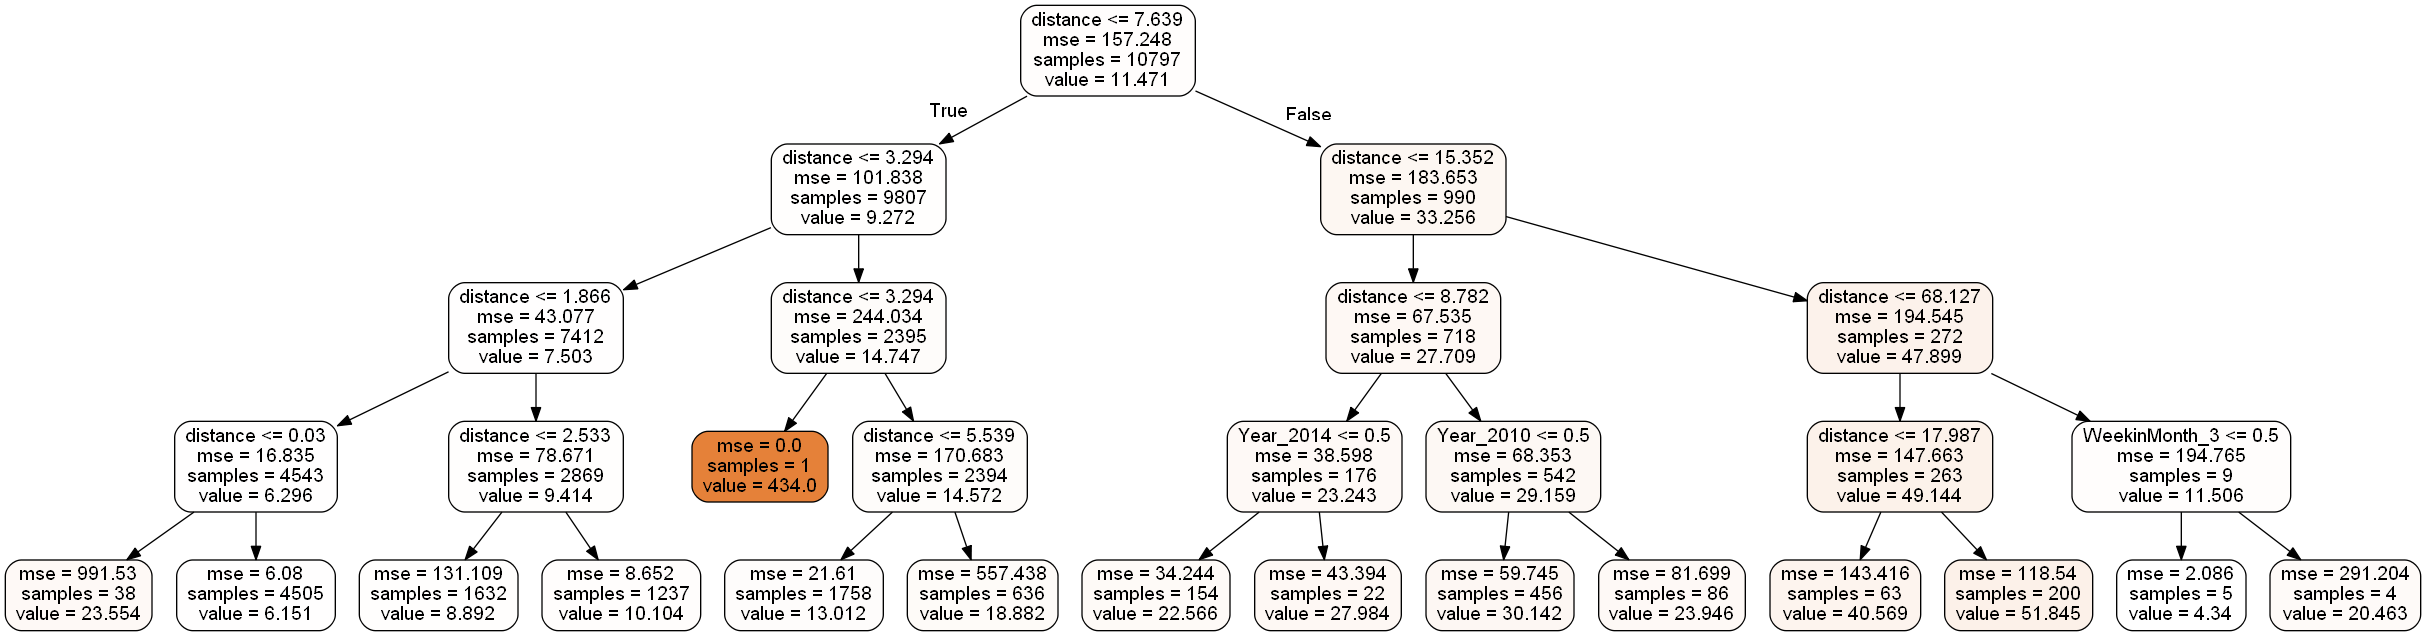

In [284]:
feature_name=list(x_train.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(model3,rounded = True,filled = True,feature_names=feature_name,class_names=class_name)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [285]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,random_state=1)
model4.fit(x_train,y_train)
pred4=model4.predict(x_test)
print(pred4)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, random_state=1)

[ 5.81522669  9.58823707  6.41921433 ...  6.65325984 10.01853163
  5.36938571]


In [286]:
rmse(y_test,pred4)

4.7119625812663255

In [287]:
mape(y_test,pred4)

22.319004356002413

In [288]:
r2_score(y_test,pred4)

0.791846027885166

In [289]:
adj_r_sq(x_train,y_train,79.18)

79.34691172375383

In [290]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
model5=ExtraTreesRegressor(n_estimators=1000,max_depth=5,random_state=0)
model5.fit(x_train,y_train)
pred5=model5.predict(x_test)
print(pred5)

ExtraTreesRegressor(max_depth=5, n_estimators=1000, random_state=0)

[ 7.89877348 10.40526982  8.0433712  ...  8.5201648   9.77181964
  7.98644248]


In [291]:
rmse(y_test,pred5)

4.7119625812663255

In [292]:
mape(y_test,pred5)

34.33236387521511

In [293]:
r2_score(y_test,pred5)

0.7003558315599897

In [294]:
adj_r_sq(x_train,y_train,70.03)

70.17737677527151

In [295]:
# Support Vector Regressor
from sklearn.svm import SVR
model6=SVR(kernel='rbf',C=100)
model6.fit(x_train,y_train)
pred6=model6.predict(x_test)
print(pred6)

SVR(C=100)

[5.17380713 9.22961102 5.65802449 ... 4.00301502 9.41569684 4.80139219]


In [296]:
rmse(y_test,pred6)

4.7119625812663255

In [297]:
mape(y_test,pred6)

17.450975108200595

In [298]:
r2_score(y_test,pred6)

0.7926177513329268

In [299]:
adj_r_sq(x_train,y_train,79.26)

79.42708252111761

- I have taken many of the regression alogorithms to build a model which predicts the fare of the cab.
- I have considered coefficient of determination(r2 score),root mean square error(rmse) and mape(mean absolute percentage error) for analyzing the model performance
- The algorithms I have taken here are Linear regression,Random Forest,Decision tree,Gradient Boosting,Extra Trees Regressor,SVR and Stacking model(combination of models)

### Stacking model

In [300]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_train,y_train,test_size=0.3,random_state=100)
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

(7557, 23) (3240, 23) (7557,) (3240,)


In [301]:
from sklearn import neighbors

In [302]:
knn=neighbors.KNeighborsRegressor(n_neighbors=5,weights='uniform')
knn.fit(x1_train,y1_train)
knn.score(x1_test,y1_test)
predict_test1=knn.predict(x1_test)
svr=SVR()
svr.fit(x1_train,y1_train)
svr.score(x1_test,y1_test)
predict_test2=svr.predict(x1_test)
predict_test=np.column_stack((predict_test1,predict_test2))
predict_val1=knn.predict(x_test)
predict_val2=svr.predict(x_test)
predict_val=np.column_stack((predict_val1,predict_val2))

KNeighborsRegressor()

0.6113115056422909

SVR()

0.7819446346987349

In [303]:
predict_test1.shape,y1_test.shape

((3240,), (3240,))

In [304]:
mape(y_test,predict_val1)

24.9812261721096

In [305]:
mape(y_test,predict_val2)

17.53149991804726

In [306]:
y1_test.shape

(3240,)

In [307]:
predict_test,predict_val

(array([[ 5.46      ,  4.14887284],
        [ 9.8       ,  8.78378372],
        [ 8.1       ,  9.22265807],
        ...,
        [15.96      , 17.09220656],
        [ 7.44      ,  6.19127886],
        [ 5.92      ,  6.00744993]]),
 array([[5.        , 5.37248549],
        [9.62      , 9.03415488],
        [7.1       , 6.02999626],
        ...,
        [4.58      , 3.7200522 ],
        [8.26      , 8.85691407],
        [6.9       , 5.07710558]]))

In [308]:
predict_test

array([[ 5.46      ,  4.14887284],
       [ 9.8       ,  8.78378372],
       [ 8.1       ,  9.22265807],
       ...,
       [15.96      , 17.09220656],
       [ 7.44      ,  6.19127886],
       [ 5.92      ,  6.00744993]])

In [309]:
y1_test

14160     3.7
15276     8.1
9741      8.1
7680      3.3
4403      3.7
         ... 
10521     8.5
12937     8.5
2269     12.1
3797      6.1
10800     5.0
Name: fare_amount, Length: 3240, dtype: float64

In [310]:
rand_reg=RandomForestRegressor()
rand_reg.fit(predict_val,y_test)
rand_reg.score(predict_test,y1_test)

RandomForestRegressor()

0.7543421509676639

In [355]:
adj_r_sq(predict_test,y1_test,75.44)

75.48599320358356

In [348]:
rand_reg0=RandomForestRegressor()
rand_reg0.fit(predict_test,y1_test)
c=rand_reg0.predict(predict_val)

RandomForestRegressor()

In [365]:
rand_reg0.predict(predict_val)

array([ 4.457 ,  8.386 ,  6.242 , ..., 22.3155,  8.095 ,  4.803 ])

In [349]:
print(c.shape,y_test.shape)

(4628,) (4628,)


In [350]:
print(type(c))
print(type(y_test))
print(type(predict_test))
print(type(y1_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [357]:
predict_test.shape

(3240, 2)

In [352]:
rand_reg0.score(predict_val,y_test)

0.7475291723495121

In [353]:
predict_test.shape,y1_test.shape

((3240, 2), (3240,))

In [358]:
c

array([ 4.457 ,  8.386 ,  6.242 , ..., 22.3155,  8.095 ,  4.803 ])

In [359]:
y_test

12648     5.5
7056      7.3
8330      6.0
14209    12.5
3368      4.9
         ... 
4576     28.9
6939      5.0
9256      4.5
7679      6.5
11049     6.1
Name: fare_amount, Length: 4628, dtype: float64

In [360]:
r2_score(y_test,c)

0.7475291723495121

In [361]:
mape(y_test,c)

25.8303516329834

In [362]:
rmse(y_test,c)

4.7119625812663255

In [363]:
adj_r_sq(predict_test,y1_test,74.75)

74.79556688291628

##### Hyperparameter tuning for Stacking model

In [ ]:
grid_param={'n_estimators':[100,500,1000,2000,2500],'min_samples_leaf':[2,4,5,8,10,20],
            'min_samples_split':[5,8,10,20,30,50],'max_features':['auto','log2','sqrt'] }

In [ ]:
grid_search = GridSearchCV(estimator=rand_reg,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [ ]:
%%time
grid_search.fit(predict_val,y_test)

- Wall time: 1h 31min 33s
- GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [2, 4, 5, 8, 10, 20],
                         'min_samples_split': [5, 8, 10, 20, 30, 50],
                         'n_estimators': [100, 500, 1000, 2000, 2500]},
             verbose=3)

- grid_search.best_params_:
{'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 2500}

In [ ]:
#grid_search.best_params_:{'max_features': 'auto','min_samples_leaf': 20,'min_samples_split': 50,'n_estimators': 2000}

In [367]:
rand_reg2=RandomForestRegressor(max_features='auto',min_samples_leaf=20,min_samples_split= 50,n_estimators=2000,random_state=0)
rand_reg2.fit(predict_val,y_test)
rand_reg2.score(predict_test,y1_test)

RandomForestRegressor(min_samples_leaf=20, min_samples_split=50,
                      n_estimators=2000, random_state=0)

0.7945248508798906

In [368]:
adj_r_sq(predict_val,y_test,79.45)

79.48392432432433

In [369]:
predict_test

array([[ 5.46      ,  4.14887284],
       [ 9.8       ,  8.78378372],
       [ 8.1       ,  9.22265807],
       ...,
       [15.96      , 17.09220656],
       [ 7.44      ,  6.19127886],
       [ 5.92      ,  6.00744993]])

In [370]:
y1_test

14160     3.7
15276     8.1
9741      8.1
7680      3.3
4403      3.7
         ... 
10521     8.5
12937     8.5
2269     12.1
3797      6.1
10800     5.0
Name: fare_amount, Length: 3240, dtype: float64

In [371]:
rand_reg3=RandomForestRegressor(max_features='auto',min_samples_leaf=20,min_samples_split= 50,n_estimators=2000,random_state=0)
rand_reg3.fit(predict_test,y1_test)
d=rand_reg3.predict(predict_val)

RandomForestRegressor(min_samples_leaf=20, min_samples_split=50,
                      n_estimators=2000, random_state=0)

In [372]:
rand_reg3.predict(predict_val)

array([ 5.33768666,  9.46309082,  6.29665049, ..., 13.2955878 ,
       10.09081536,  4.89266319])

In [373]:
r2_score(y_test,d)

0.7935579384369056

In [374]:
rmse(y_test,d)

4.7119625812663255

In [375]:
mape(y_test,d)

22.927034308644767

In [376]:
adj_r_sq(predict_test,y1_test,79.35)

79.39840902069818

### Hyperparameter tuning

In [ ]:
# Decision tree tuning
rand_param={'max_depth':[2,3,5,7,10],'min_samples_leaf':[2,5,7,10,15],'min_samples_split':[2,5,7,10],'max_features'
             :['auto','sqrt','log2']}

In [ ]:
# random forest tuning
#rand_param2={'n_estimators':[1000,2000,5000,10000,50000],'max_depth':[2,3,5,7,10,15],'min_samples_leaf':[2,3,5,7,10,20],
 #           'min_samples_split':[5,8,7,10,15,20],'max_features':['auto','sqrt','log2'],'oob_score':[True]}

In [ ]:
# Best_params from above:{'oob_score': True,'n_estimators': 10000,'min_samples_split': 5,'min_samples_leaf': 5,'max_features': 'auto','max_depth': 15}

In [ ]:
# rand_param2={'n_estimators':[1000,10000,30000],'max_depth':[2,5,15],'min_samples_leaf':[2,5,10],
   #         'min_samples_split':[5,10,20],'max_features':['auto','sqrt','log2'],'oob_score':[True]}

In [ ]:
#rand_search=RandomizedSearchCV(model1,param_distributions=rand_param2,n_iter=5,cv=5,random_state=1)

In [ ]:
# %%time
# rand_search.fit(x_train,y_train)

In [ ]:
# rand_search.best_params_

In [ ]:
#rand_search.best_estimator_

In [ ]:
rand_search2=RandomizedSearchCV(model3,param_distributions=rand_param,n_iter=5,cv=5,random_state=1)

In [ ]:
%%time
rand_search2.fit(x_train,y_train)

- Wall time: 970 ms
- RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
                   n_iter=5,
                   param_distributions={'max_depth': [2, 3, 5, 7, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 7, 10, 15],
                                        'min_samples_split': [2, 5, 7, 10]},
                   random_state=1)

In [ ]:
rand_search2.best_params_

- rand_search2.best_params_: {'min_samples_split': 5,'min_samples_leaf': 7,'max_features': 'auto','max_depth': 7}

- rand_search2.best_score_: 0.4666729124720357

- rand_search2.best_index_: 0

In [ ]:
# Gradient descent
#rand_param3={'loss':['ls','lad','huber','quantile'],'learning_rate':[0.1,0.01,0.05,0.5,0.8],
 #            'n_estimators':[10,500,1000,5000,10000],'criterion':['friedman_mse','mse','mae'],'min_samples_split':[5,8,7,10,20],
 #            'min_samples_leaf':[2,3,5,7,10,20],'max_depth':[2,5,7,10,15,20,50],'max_features':['auto','sqrt','log2']}

In [ ]:
#Best params from rand_param3:{'n_estimators': 1000,'min_samples_split': 7,'min_samples_leaf': 7,'max_features': 'sqrt','max_depth': 15,'loss': 'ls','learning_rate': 0.1,'criterion': 'mae'}

In [ ]:
#rand_param3={'loss':['ls','huber'],'learning_rate':[0.1,0.01,0.5],
 #            'n_estimators':[10,1000,5000],'criterion':['mse','mae'],'min_samples_split':[5,7,10],
 #            'min_samples_leaf':[2,7,10],'max_depth':[2,10,15],'max_features':['auto','sqrt','log2']}

In [ ]:
#rand_search3=RandomizedSearchCV(model4,param_distributions=rand_param3,n_iter=5,cv=5,random_state=1)

In [ ]:
%%time
#rand_search3.fit(x_train,y_train)

In [ ]:
#rand_search3.best_params_

In [ ]:
# lets use gridsearchcv approach randomsearchcv is not giving much desired results for model4:Gradient descent
rand_param3={'loss':['ls','huber'],'learning_rate':[0.1,0.2],
             'n_estimators':[1000,1500],'criterion':['mse','mae'],'min_samples_split':[7,10],
             'min_samples_leaf':[7,10],'max_depth':[15,30],'max_features':['auto','sqrt']}

In [ ]:
#grid_search3=GridSearchCV(model4,param_grid=grid_param3,n_jobs=-1,cv=5,verbose=8)
#Gridsearch seems not more time consuming and not working well and getting stopped so i used rand_search3 results for 
       #model4 Gradient Boosting algorithm.

In [ ]:
# Extra Trees Regressor
rand_param4={'n_estimators':[100,1000,10000],'criterion':['mse','mae'],'max_depth':[7,20],
             'min_samples_split':[7,10],'min_samples_leaf':[7,10],'max_features':['auto','log2','sqrt']}

In [ ]:
rand_search4=RandomizedSearchCV(estimator=model5,param_distributions=rand_param4,n_iter=5,cv=5,random_state=1)

In [ ]:
rand_search4.fit(x_train,y_train)

- rand_search4.fit(x_train,y_train): RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesRegressor(max_depth=5, n_estimators=1000,
                                                 random_state=0),
                   n_iter=5,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [7, 20],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [7, 10],
                                        'min_samples_split': [7, 10],
                                        'n_estimators': [100, 1000, 10000]},
                   random_state=1)

In [ ]:
#%%time
#grid_search4.fit(x_train,y_train)

In [ ]:
#Fitting 5 folds for each of 144 candidates, totalling 720 fits
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
#[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.1s
#[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
#[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.8min
#[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.5min
#[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 17.4min
#[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 19.8min
#[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 47.3min
#[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 55.2min
#[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 56.9min
#[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 61.5min
#[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 64.9min
#[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 67.8min
#[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 71.9min
#[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 75.0min
#[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 80.7min
#[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed: 103.5min
#[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed: 120.4min
#[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed: 134.6min
#[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 139.2min
#[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed: 143.6min
#[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed: 148.1min
#[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 152.7min

In [ ]:
rand_search4.best_params_

In [ ]:
rand_search4.best_estimator_

- rand_search4.best_params_: {'n_estimators': 10000,'min_samples_split': 10,'min_samples_leaf': 7,'max_features': 'log2','max_depth': 20,'criterion': 'mse'}
- rand_search4.best_estimator_: ExtraTreesRegressor(max_depth=20, max_features='log2', min_samples_leaf=7,min_samples_split=10, n_estimators=10000, random_state=0)

In [294]:
# SVR tuning
grid_param5={'kernel':['rbf','linear','poly'],'gamma':['scale','auto'],'C':[1.0,100,1000]}

In [ ]:
#rand_search5=RandomizedSearchCV(model6,param_distributions=rand_param5,cv=5,n_iter=5,random_state=1)

In [ ]:
#%%time
#rand_search5.fit(x_train,y_train)

In [ ]:
#rand_search5.best_params_

In [ ]:
#rand_search5.best_estimator_

In [295]:
grid_search5=GridSearchCV(model6,param_grid=grid_param5,cv=4,n_jobs=-1,verbose=10)

In [296]:
grid_search5.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 208.8min
[Parallel(n_jobs=-1)]: Done  65 out of  72 | elapsed: 373.8min remaining: 40.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 2904.8min finished


GridSearchCV(cv=4, estimator=SVR(C=100), n_jobs=-1,
             param_grid={'C': [1.0, 100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=10)

In [297]:
grid_search5.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [298]:
grid_search5.best_estimator_

SVR(C=100)

- grid_search5.fit(x_train,y_train): 
             GridSearchCV(cv=4, estimator=SVR(C=100), n_jobs=-1,
             param_grid={'C': [1.0, 100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=10)

- grid_search5.best_params_:
       {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

- grid_search5.best_estimator_:
    SVR(C=100)

### Model building after Hyperparameter tuning

In [313]:
model1_rf=RandomForestRegressor(oob_score=True,n_estimators= 10000,min_samples_split= 5,min_samples_leaf= 5,
                                max_features= 'auto',max_depth= 15,random_state=1)
model1_rf.fit(x_train,y_train)
pred1_rf=model1_rf.predict(x_test)
print(pred1_rf)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=10000, oob_score=True, random_state=1)

[ 5.51932115  9.3976026   6.29195764 ...  5.93723879 10.25447255
  5.26004802]


In [314]:
rmse(y_test,pred1_rf)

4.7119625812663255

In [315]:
mape(y_test,pred1_rf)

23.655665360916597

In [316]:
r2_score(y_test,pred1_rf)

0.7483147740577369

In [317]:
model3_dt=DecisionTreeRegressor(min_samples_split=5,min_samples_leaf=7,max_features='auto',random_state=1,max_depth=7)
model3_dt.fit(x_train,y_train)
pred3_dt=model3_dt.predict(x_test)
print(pred3_dt)

DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_leaf=7,
                      min_samples_split=5, random_state=1)

[ 5.80986239  9.47197689  5.80986239 ...  6.47868852 10.18681319
  5.80986239]


In [318]:
rmse(y_test,pred3_dt)

4.7119625812663255

In [319]:
mape(y_test,pred3_dt)

25.015504604314543

In [320]:
r2_score(y_test,pred3_dt)

0.6822464706236201

In [321]:
model4_gb=GradientBoostingRegressor(n_estimators=1000,min_samples_split= 7,min_samples_leaf= 7,max_features= 'sqrt',
                                    max_depth= 15,loss= 'ls',criterion= 'mae',learning_rate=0.1,random_state=1)
model4_gb.fit(x_train,y_train)
pred4_gb=model4_gb.predict(x_test)
print(pred4_gb)

GradientBoostingRegressor(criterion='mae', max_depth=15, max_features='sqrt',
                          min_samples_leaf=7, min_samples_split=7,
                          n_estimators=1000, random_state=1)

[5.98320844 9.12872323 6.51982539 ... 7.29500988 8.83978498 5.23079539]


In [322]:
rmse(y_test,pred4_gb)

4.7119625812663255

In [323]:
mape(y_test,pred4_gb)

21.986208101769517

In [324]:
r2_score(y_test,pred4_gb)

0.7790873059686224

In [325]:
#{'n_estimators': 10000,'min_samples_split': 10,'min_samples_leaf': 7,'max_features': 'log2','max_depth': 20,'criterion': 'mse'}

In [326]:
model5_et=ExtraTreesRegressor(n_estimators= 10000,min_samples_split=10,min_samples_leaf=7,max_features='log2',max_depth=20,
                              criterion='mse',random_state=0)
model5_et.fit(x_train,y_train)
pred5_et=model5_et.predict(x_test)
print(pred5_et)

ExtraTreesRegressor(max_depth=20, max_features='log2', min_samples_leaf=7,
                    min_samples_split=10, n_estimators=10000, random_state=0)

[ 9.66315539 10.07852415 10.97835535 ...  8.94604571 11.96912291
  9.19543581]


In [327]:
rmse(y_test,pred5_et)

4.7119625812663255

In [328]:
mape(y_test,pred5_et)

48.292845999957464

In [329]:
r2_score(y_test,pred5_et)

0.4428243105093005

In [330]:
model6_svr=SVR(gamma='scale',kernel='rbf',C=100)
model6_svr.fit(x_train,y_train)
pred6_svr=model6_svr.predict(x_test)
print(pred6_svr)

SVR(C=100)

[5.17380713 9.22961102 5.65802449 ... 4.00301502 9.41569684 4.80139219]


In [331]:
rmse(y_test,pred6_svr)

4.7119625812663255

In [332]:
mape(y_test,pred6_svr)

17.450975108200595

In [333]:
r2_score(y_test,pred6_svr)

0.7926177513329268

In [377]:
adj_r_sq(x_train,y_train,79.26)

79.42708252111761

### Prediction on test set

In [334]:
dtest.head()

distance  passenger_count_2  passenger_count_3  passenger_count_4  \
0  2.323259                  0                  0                  0   
1  2.425353                  0                  0                  0   
2  0.618628                  0                  0                  0   
3  1.961033                  0                  0                  0   
4  5.387301                  0                  0                  0   

   passenger_count_5  passenger_count_6  Year_2010  Year_2011  Year_2012  \
0                  0                  0          0          0          0   
1                  0                  0          0          0          0   
2                  0                  0          0          1          0   
3                  0                  0          0          0          1   
4                  0                  0          0          0          1   

   Year_2013  ...  Time_of_day_2  Time_of_day_3  Season_1  Season_2  Season_3  \
0          0  ...              0              0         1         0         0   
1          0  ...              0              0         1         0         0   
2          0  ...              0              0         0         0         0   
3          0  ...              0              1         0         0         0   
4          0  ...              0              1         0         0         0   

   Weektype_1  WeekinMonth_1  WeekinMonth_2  WeekinMonth_3  MonDays_1  
0           0              0              0              1          1  
1           0              0              0              1          1  
2           1              1              0              0          0  
3           1              0              0              0          0  
4           1              0              0              0          0  

[5 rows x 23 columns]

In [335]:
dtest.shape

(9829, 23)

In [336]:
dtest.isnull().sum()

distance             0
passenger_count_2    0
passenger_count_3    0
passenger_count_4    0
passenger_count_5    0
passenger_count_6    0
Year_2010            0
Year_2011            0
Year_2012            0
Year_2013            0
Year_2014            0
Year_2015            0
Time_of_day_1        0
Time_of_day_2        0
Time_of_day_3        0
Season_1             0
Season_2             0
Season_3             0
Weektype_1           0
WeekinMonth_1        0
WeekinMonth_2        0
WeekinMonth_3        0
MonDays_1            0
dtype: int64

In [337]:
dtest.columns

Index(['distance', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Time_of_day_1', 'Time_of_day_2', 'Time_of_day_3',
       'Season_1', 'Season_2', 'Season_3', 'Weektype_1', 'WeekinMonth_1',
       'WeekinMonth_2', 'WeekinMonth_3', 'MonDays_1'],
      dtype='object')

In [338]:
final_pred=model6_svr.predict(dtest)

In [339]:
print(final_pred)

[10.20326289 10.52456715  4.42424695 ... 54.64115436 24.81658498
  5.93007368]


In [340]:
final_pred.shape

(9829,)

In [341]:
test_df=dtest.copy()

In [342]:
test_df.shape

(9829, 23)

In [343]:
test_df['fare_amount']=final_pred

In [344]:
test_df.shape

(9829, 24)

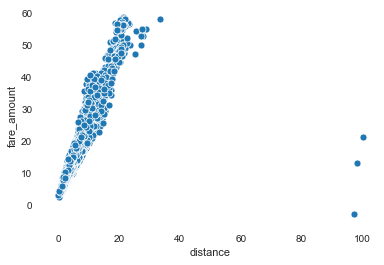

In [411]:
sns.scatterplot('distance','fare_amount',data=test_df)

In [345]:
test_df.head()

distance  passenger_count_2  passenger_count_3  passenger_count_4  \
0  2.323259                  0                  0                  0   
1  2.425353                  0                  0                  0   
2  0.618628                  0                  0                  0   
3  1.961033                  0                  0                  0   
4  5.387301                  0                  0                  0   

   passenger_count_5  passenger_count_6  Year_2010  Year_2011  Year_2012  \
0                  0                  0          0          0          0   
1                  0                  0          0          0          0   
2                  0                  0          0          1          0   
3                  0                  0          0          0          1   
4                  0                  0          0          0          1   

   Year_2013  ...  Time_of_day_3  Season_1  Season_2  Season_3  Weektype_1  \
0          0  ...              0         1         0         0           0   
1          0  ...              0         1         0         0           0   
2          0  ...              0         0         0         0           1   
3          0  ...              1         0         0         0           1   
4          0  ...              1         0         0         0           1   

   WeekinMonth_1  WeekinMonth_2  WeekinMonth_3  MonDays_1  fare_amount  
0              0              0              1          1    10.203263  
1              0              0              1          1    10.524567  
2              1              0              0          0     4.424247  
3              0              0              0          0     8.026364  
4              0              0              0          0    14.910192  

[5 rows x 24 columns]

In [382]:
test_df.tail()

distance  passenger_count_2  passenger_count_3  passenger_count_4  \
9824   2.124874                  0                  0                  0   
9825   3.270969                  0                  0                  0   
9826  19.183942                  0                  0                  0   
9827   8.343486                  0                  0                  0   
9828   1.180825                  0                  0                  0   

      passenger_count_5  passenger_count_6  Year_2010  Year_2011  Year_2012  \
9824                  0                  1          0          0          0   
9825                  0                  1          0          0          0   
9826                  0                  1          0          0          0   
9827                  0                  1          0          0          0   
9828                  0                  1          0          0          0   

      Year_2013  ...  Time_of_day_3  Season_1  Season_2  Season_3  Weektype_1  \
9824          0  ...              0         0         0         1           1   
9825          0  ...              0         1         0         0           0   
9826          0  ...              1         0         0         1           1   
9827          0  ...              1         1         0         0           1   
9828          0  ...              0         1         0         0           1   

      WeekinMonth_1  WeekinMonth_2  WeekinMonth_3  MonDays_1  fare_amount  
9824              1              0              0          0     8.503446  
9825              1              0              0          0    14.321669  
9826              0              1              0          1    54.641154  
9827              0              0              1          1    24.816585  
9828              0              1              0          1     5.930074  

[5 rows x 24 columns]

In [378]:
#Predictions made using Stacking model as this also good performing model for this data
#pred_vald1=knn.predict(dtest)
#pred_vald2=svr.predict(dtest)
#pred_vald=np.column_stack((pred_vald1,pred_vald2))
#final_stack=rand_reg3.predict(pred_vald)

In [381]:
#print(final_stack)

[ 9.87359918  9.83699081  5.33386355 ... 51.00925939 21.4345944
  6.95492089]


In [346]:
test_df.to_csv("Proj_cab_fare_prediction.csv",index=False)